# Credict Score Exploratory Data Analysis and Classification

## Inroduction

The credit score of a person determines the creditworthiness of the person. It helps financial companies determine if you can repay the loan or credit you are applying for.

## Content
1. [Python Libraries](#1)
2. [Variable Description](#2)
3. [Reading and Editing Data](#3)
    * [Editing Numeric Data](#4)
    * [Editing Categorical Data](#5)
4. [Handling Missing Value](#6)
    * [Handling Missing Value for Categorical Variables](#7)
    * [Handling Missing Value for Numerical Variables](#8)
5. [Outlier Detection](#9)
6. [Examining Data Visually](#10)
    * [Distribution of Credit Score](#11)
    * [Countplot of Categorical Variables](#12)
    * [Relationship of Categorical Variables to Dependent Variable](#13)
        * [Chi-square Test of Independence](#14)
    * [Relationship of Numerical Variables to Dependent Variable](#15)
        * [One Way ANOVA Test](#16)
7. [Exploratory Data Analysis](#17)
8. [Model Building](#18)
    * [Encoding, Normalization and Train Test Split](#19)
    * [Sampling with SMOTE](#20)
    * [Principal Component Analysis](#21)
    * [Model Selection](#22)
    * [Hyperparameter Tuning and Model Results](#23)
    * [Ensemble Modeling](#24)
9. [Conclusion](#25)

<a id="1"></a>
## Python Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import missingno as msno
import pingouin as pg


import os
for dirname, _, filenames in os.walk('/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


from scipy import stats
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedKFold
from sklearn.metrics import auc,accuracy_score,classification_report, roc_curve, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
plt.style.use("seaborn-notebook")
import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
## Variable Description

* **ID:** Unique ID of the record
* **Customer_ID:** Unique ID of the customer
* **Month:** Month of the year
* **Name:** The name of the person
* **Age:** The age of the person
* **SSN:** Social Security Number of the person
* **Occupation:** The occupation of the person
* **Annual_Income:** The Annual Income of the person
* **Monthly_Inhand_Salary:** Monthly in-hand salary of the person
* **Num_Bank_Accounts:** The number of bank accounts of the person
* **Num_Credit_Card:** Number of credit cards the person is having
* **Interest_Rate:** The interest rate on the credit card of the person
* **Num_of_Loan:** The number of loans taken by the person from the bank
* **Type_of_Loan:** The types of loans taken by the person from the bank
* **Delay_from_due_date:** The average number of days delayed by the person from the date of payment
* **Num_of_Delayed_Payment:** Number of payments delayed by the person
* **Changed_Credit_Card:** The percentage change in the credit card limit of the person
* **Num_Credit_Inquiries:** The number of credit card inquiries by the person
* **Credit_Mix:** Classification of Credit Mix of the customer
* **Outstanding_Debt:** The outstanding balance of the person
* **Credit_Utilization_Ratio:** The credit utilization ratio of the credit card of the customer
* **Credit_History_Age:** The age of the credit history of the person
* **Payment_of_Min_Amount:** Yes if the person paid the minimum amount to be paid only, otherwise no.
* **Total_EMI_per_month:** The total EMI per month of the person
* **Amount_invested_monthly:** The monthly amount invested by the person
* **Payment_Behaviour:** The payment behaviour of the person
* **Monthly_Balance:** The monthly balance left in the account of the person
* **Credit_Score:** The credit score of the person

<a id="3"></a>
## Reading and Editing Data

In this section: We will import data and observe data. Then We will find and correct incorrectly entered values in each variable.


In [3]:
data=pd.read_csv("data/train.csv")
data_copy=data.copy()

data_copy.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
1                     No           49.574949      118.28022162236736   
2                     No           49.574949         81.699521264648   
3                     No           49.574949       199.4580743910713   
4                     No           49.574949      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
1    Low_spent_Large_value_payments  284.62916249607184         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  

[5 rows x 28 columns]

* There are incorrectly entered values in age and Credit_Mix. Other variables may also have incorrectly entered values. We will examine it in detail.

In [4]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
data_copy.isnull().sum() # check missing value

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [6]:
data_copy[data_copy.duplicated()] # check duplicated data

Empty DataFrame
Columns: [ID, Customer_ID, Month, Name, Age, SSN, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

[0 rows x 28 columns]

In [7]:
# ID, Name and SSN are unnecessary variables for our analysis.
data_copy.drop(["ID","Name","SSN"], axis=1, inplace=True)

In [8]:
# describe
data_copy.describe().T

count         mean          std         min  \
Monthly_Inhand_Salary      84998.0  4194.170850  3183.686167  303.645417   
Num_Bank_Accounts         100000.0    17.091280   117.404834   -1.000000   
Num_Credit_Card           100000.0    22.474430   129.057410    0.000000   
Interest_Rate             100000.0    72.466040   466.422621    1.000000   
Delay_from_due_date       100000.0    21.068780    14.860104   -5.000000   
Num_Credit_Inquiries       98035.0    27.754251   193.177339    0.000000   
Credit_Utilization_Ratio  100000.0    32.285173     5.116875   20.000000   
Total_EMI_per_month       100000.0  1403.118217  8306.041270    0.000000   

                                  25%          50%          75%           max  
Monthly_Inhand_Salary     1625.568229  3093.745000  5957.448333  15204.633333  
Num_Bank_Accounts            3.000000     6.000000     7.000000   1798.000000  
Num_Credit_Card              4.000000     5.000000     7.000000   1499.000000  
Interest_Rate                8.000000    13.000000    20.000000   5797.000000  
Delay_from_due_date         10.000000    18.000000    28.000000     67.000000  
Num_Credit_Inquiries         3.000000     6.000000     9.000000   2597.000000  
Credit_Utilization_Ratio    28.052567    32.305784    36.496663     50.000000  
Total_EMI_per_month         30.306660    69.249473   161.224249  82331.000000

* The number of bank accounts of the person have very high maximum value. Also its minimum value is negative value. This variable do not include negative values.
* The number of credit card of the person have very high maximum value.
* The number of credit card inquiries by the person have very high maximum value.
* It can be observed that there are outlier observations in the data set.

In [9]:
data_copy.describe(exclude=np.number).T

count unique                               top  \
Customer_ID              100000  12500                         CUS_0xd40   
Month                    100000      8                           January   
Age                      100000   1788                                38   
Occupation               100000     16                           _______   
Annual_Income            100000  18940                          36585.12   
Num_of_Loan              100000    434                                 3   
Type_of_Loan              88592   6260                     Not Specified   
Num_of_Delayed_Payment    92998    749                                19   
Changed_Credit_Limit     100000   4384                                 _   
Credit_Mix               100000      4                          Standard   
Outstanding_Debt         100000  13178                           1360.45   
Credit_History_Age        90970    404            15 Years and 11 Months   
Payment_of_Min_Amount    100000      3                               Yes   
Amount_invested_monthly   95521  91049                         __10000__   
Payment_Behaviour        100000      7    Low_spent_Small_value_payments   
Monthly_Balance           98800  98792  __-333333333333333333333333333__   
Credit_Score             100000      3                          Standard   

                          freq  
Customer_ID                  8  
Month                    12500  
Age                       2833  
Occupation                7062  
Annual_Income               16  
Num_of_Loan              14386  
Type_of_Loan              1408  
Num_of_Delayed_Payment    5327  
Changed_Credit_Limit      2091  
Credit_Mix               36479  
Outstanding_Debt            24  
Credit_History_Age         446  
Payment_of_Min_Amount    52326  
Amount_invested_monthly   4305  
Payment_Behaviour        25513  
Monthly_Balance              9  
Credit_Score             53174

<a id="4"></a>
## Editing Numeric Data

* Let's edit the incorrectly entered data in numeric variables.

In [10]:
wrong_numeric_list=["Age","Annual_Income","Num_of_Loan","Num_of_Delayed_Payment","Changed_Credit_Limit","Outstanding_Debt","Amount_invested_monthly","Monthly_Balance"]

for i in wrong_numeric_list:
    print(data_copy[i].unique())

['23' '-500' '28_' ... '4808_' '2263' '1342']
['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']
['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '1106' '466' '728' '313' '843'
 '597_' '617' '119' '663' '640' '92_' '1019' '501' '1302' '39' '716' '848'
 '931' '1214' '186' '424' '1001' '1110' '1152' '457' '1433' '1187' '52'
 '1480' '1047' '1035' '1347_' '33' '193' '699' '329' '1451' '484' '132'
 '649' '995' '545' '684' '1135' '1094' '1204' '654' '58' '348' '614'
 '1363' '323' '1406' '1348' '430' '153' '1461' '905' '1312' '1424' '1154'
 '95' '1353' '1228' '819' '1006' '795' '359' '1209' '590' '696' '1185_'
 '1465' '911' '1181' '70' '816' '1369' '143' '1416' '455' '55' '1096'
 '1474' '420' '1131' '904' '89' '1259' '527' '1241' '449' '983' '418'
 '319' '23' '238' '638' '138' '235_' '280' '1070' '1484' '274' '494'
 '1459_' '404'

Incorrect values contain "_".

In [11]:
for i in wrong_numeric_list:
    data_copy[i]=data_copy[i].str.replace("_","")
    try:
        data_copy[i]=data_copy[i].astype("float")
        data_copy[i]=data_copy[i].astype("float")
    except:
        continue

In [12]:
for i in wrong_numeric_list:
    print(i,": ",data_copy[i].dtype)

Age :  float64
Annual_Income :  float64
Num_of_Loan :  float64
Num_of_Delayed_Payment :  float64
Changed_Credit_Limit :  object
Outstanding_Debt :  float64
Amount_invested_monthly :  float64
Monthly_Balance :  float64


* Could not convert Changed_Credit_Limit to float. The reason is that "" cannot be converted to float.

In [13]:
for i in data_copy[data_copy["Changed_Credit_Limit"]==""].index.tolist():
    data_copy.loc[i,"Changed_Credit_Limit"]=np.nan

In [14]:
data_copy["Changed_Credit_Limit"]=data_copy["Changed_Credit_Limit"].astype("float")

In [15]:
# Describe
data_copy.describe()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  100000.000000   1.000000e+05           84998.000000      100000.000000   
mean      110.649700   1.764157e+05            4194.170850          17.091280   
std       686.244717   1.429618e+06            3183.686167         117.404834   
min      -500.000000   7.005930e+03             303.645417          -1.000000   
25%        24.000000   1.945750e+04            1625.568229           3.000000   
50%        33.000000   3.757861e+04            3093.745000           6.000000   
75%        42.000000   7.279092e+04            5957.448333           7.000000   
max      8698.000000   2.419806e+07           15204.633333        1798.000000   

       Num_Credit_Card  Interest_Rate    Num_of_Loan  Delay_from_due_date  \
count     100000.00000  100000.000000  100000.000000        100000.000000   
mean          22.47443      72.466040       3.009960            21.068780   
std          129.05741     466.422621      62.647879            14.860104   
min            0.00000       1.000000    -100.000000            -5.000000   
25%            4.00000       8.000000       1.000000            10.000000   
50%            5.00000      13.000000       3.000000            18.000000   
75%            7.00000      20.000000       5.000000            28.000000   
max         1499.00000    5797.000000    1496.000000            67.000000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count            92998.000000          97909.000000          98035.000000   
mean                30.923342             10.389025             27.754251   
std                226.031892              6.789496            193.177339   
min                 -3.000000             -6.490000              0.000000   
25%                  9.000000              5.320000              3.000000   
50%                 14.000000              9.400000              6.000000   
75%                 18.000000             14.870000              9.000000   
max               4397.000000             36.970000           2597.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
count     100000.000000             100000.000000        100000.000000   
mean        1426.220376                 32.285173          1403.118217   
std         1155.129026                  5.116875          8306.041270   
min            0.230000                 20.000000             0.000000   
25%          566.072500                 28.052567            30.306660   
50%         1166.155000                 32.305784            69.249473   
75%         1945.962500                 36.496663           161.224249   
max         4998.070000                 50.000000         82331.000000   

       Amount_invested_monthly  Monthly_Balance  
count             95521.000000     9.713200e+04  
mean                637.412998    -3.088580e+22  
std                2043.319327     3.208492e+24  
min                   0.000000    -3.333333e+26  
25%                  74.534002     2.699858e+02  
50%                 135.925682     3.364493e+02  
75%                 265.731733     4.696405e+02  
max               10000.000000     1.602041e+03

* Min of age value is -500. Age variables shouldn't have negative values.
* Min of Num_Bank_Accounts is -1. Num_Bank_Accounts variables shouldn't have negative values.
* Min of Num_of_Loan is -100. Num_of_Loan variables shouldn't have negative values.
* The customer may have paid his loan before the due date. Therefore Delay_from_due_date can contain negative values.
* Numerical variables include outlier values.

In [16]:
for i in ["Age","Num_Bank_Accounts","Num_of_Loan"]:
    data_copy.loc[data_copy[i]<0,i]=np.nan

* Let's examine the correlation between numerical variables

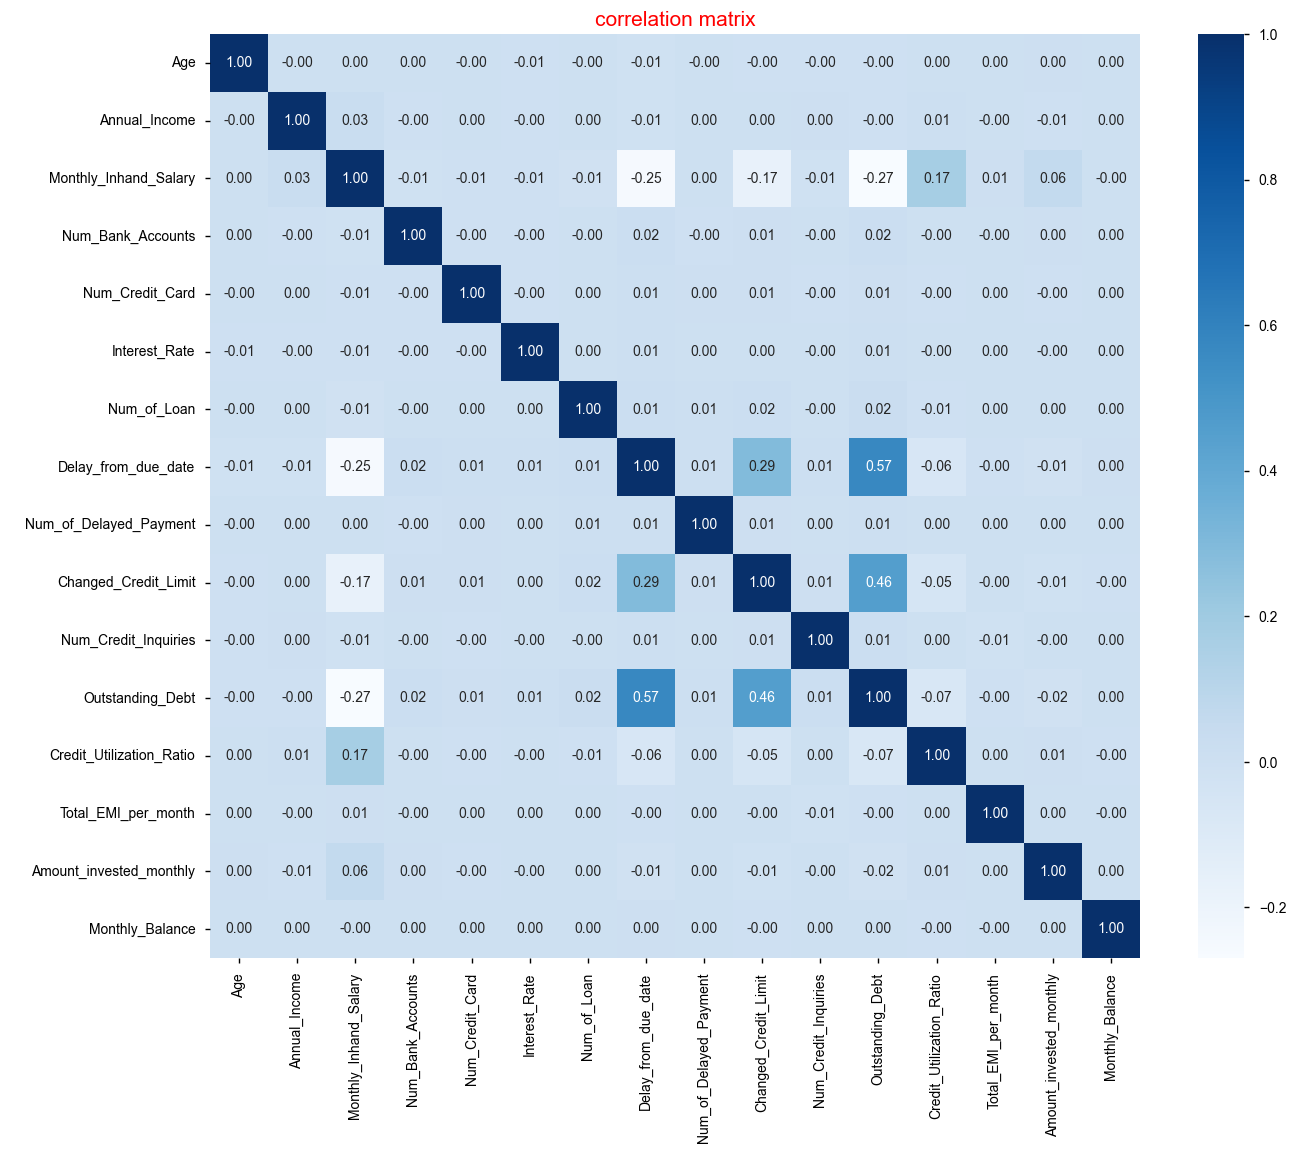

In [17]:
# correlation analysis
df_corr=data_copy.select_dtypes(include=["float64","int64"]).corr()

plt.figure(figsize=(15,12))
plt.title("correlation matrix", color="red",fontsize=15)
sns.heatmap(df_corr,annot=True,cmap="Blues",fmt=".2f")
sns.set(font_scale=1,style='white')
plt.show()

* There is a moderate positive correlation between Delay_from_due_date and Outstanding_Depdt
* There is a moderate positive correlation between Changed_Credict_Limit and Outstanding_Depdt

<a id="5"></a>
## Editing Categorical Data

* Let's edit the incorrectly entered data in categorical variables.

In [18]:

for i in data_copy.select_dtypes(include="object").columns.tolist():
    print("********{} value counts********".format(i))
    print(data_copy[i].value_counts())

********Customer_ID value counts********
Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64
********Month value counts********
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
********Occupation value counts********
Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64
********Type_of_Loan value counts********
Type_of_Loan
Not Specified                      

* Editing Credit_History_Age

We will prefer to display the Credit_History_Age variable by month.

In [19]:
def month_cover(x):
    if pd.notnull(x):
        num1=int(x.split(" ")[0])
        num2=int(x.split(" ")[3])
        
        return (num1*12)+num2
    else:
        return x

In [20]:
data_copy['Credit_History_Age'] = data_copy.Credit_History_Age.apply(lambda x: month_cover(x)).astype(float)
data_copy['Credit_History_Age'].head()

0    265.0
1      NaN
2    267.0
3    268.0
4    269.0
Name: Credit_History_Age, dtype: float64

* Editing Payment_of_Min_Amount

In [21]:
data_copy['Payment_of_Min_Amount'].replace("NM","No",inplace=True)

* Editing Payment_Behaviour

In [22]:
data_copy['Payment_Behaviour']= data_copy['Payment_Behaviour'].replace("!@9#%8",np.nan)
data_copy['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: count, dtype: int64

* Editing Occupation

In [23]:
data_copy["Occupation"].value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [24]:
data_copy["Occupation"]=data_copy["Occupation"].replace("_______",np.nan)
data_copy["Occupation"].value_counts()

Occupation
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

* Editing Credit_Mix

In [25]:
data_copy["Credit_Mix"]=data_copy["Credit_Mix"].replace("_",np.nan)
data_copy["Credit_Mix"].value_counts()

Credit_Mix
Standard    36479
Good        24337
Bad         18989
Name: count, dtype: int64

* Editing Type_of_Loan

In some observations, there is more than one type of loan. Let's show these in separate columns.

In [26]:
data_copy["Type_of_Loan"].value_counts()[:20]

Type_of_Loan
Not Specified                               1408
Credit-Builder Loan                         1280
Personal Loan                               1272
Debt Consolidation Loan                     1264
Student Loan                                1240
Payday Loan                                 1200
Mortgage Loan                               1176
Auto Loan                                   1152
Home Equity Loan                            1136
Personal Loan, and Student Loan              320
Not Specified, and Payday Loan               272
Mortgage Loan, and Home Equity Loan          264
Student Loan, and Payday Loan                256
Credit-Builder Loan, and Not Specified       248
Student Loan, and Credit-Builder Loan        248
Payday Loan, and Auto Loan                   240
Payday Loan, and Debt Consolidation Loan     240
Payday Loan, and Student Loan                232
Personal Loan, and Credit-Builder Loan       232
Mortgage Loan, and Not Specified             232
Name: c

The first 9 most observed ones appear more than once among the other observations.

In [27]:
a={
    True:1,
    False:0
}

In [28]:
# To avoid the dummy variable trap, we will initialize the index at once.

for i in data_copy["Type_of_Loan"].value_counts().head(9).index[1:]:
    data_copy[i]=data_copy["Type_of_Loan"].str.contains(i).map(a) # create dummy variable for Type_of_Loan variable

data_copy.drop("Type_of_Loan",axis=1,inplace=True)
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       99114 non-null   float64
 3   Occupation                92938 non-null   object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         99979 non-null   float64
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               96124 non-null   float64
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   float64
 12  Changed_Credit_Limit      97909 non-null   float64
 13  Num_Credit_Inquiries      98035 non-null   fl

* Edit Customer_Id

In [29]:
data_copy['Customer_ID'] = data_copy.Customer_ID.apply(lambda x: int(x[4:], 16))

<a id="6"></a>
## Handling Missing Value

* We will fill in the empty values in the loan type variables with the KNN Imputer method.
* We will visualize the missing data with the help of the missingno library. We will examine the correlation between missing data. If the correlation is high, the missing data did not occur randomly. In this case, we will remove these observations from the data set.
* Each id represents a customer and the customer has multiple transactions recorded. Considering this situation, we will fill in the missing values.

In [30]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)

for col in data_copy.columns[-8:].tolist():
    imputer.fit(data_copy[['Customer_ID',col]])
    data_copy[['Customer_ID',col]] = imputer.transform(data_copy[['Customer_ID',col]])

data_copy.isnull().sum()

Customer_ID                     0
Month                           0
Age                           886
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts              21
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  3876
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              2868
Credit_Score                    0
Credit-Builder Loan             0
Personal Loan                   0
Debt Consolidation Loan         0
Student Loan                    0
Payday Loan                     0
Mortgage Loan 

<Figure size 1000x800 with 0 Axes>

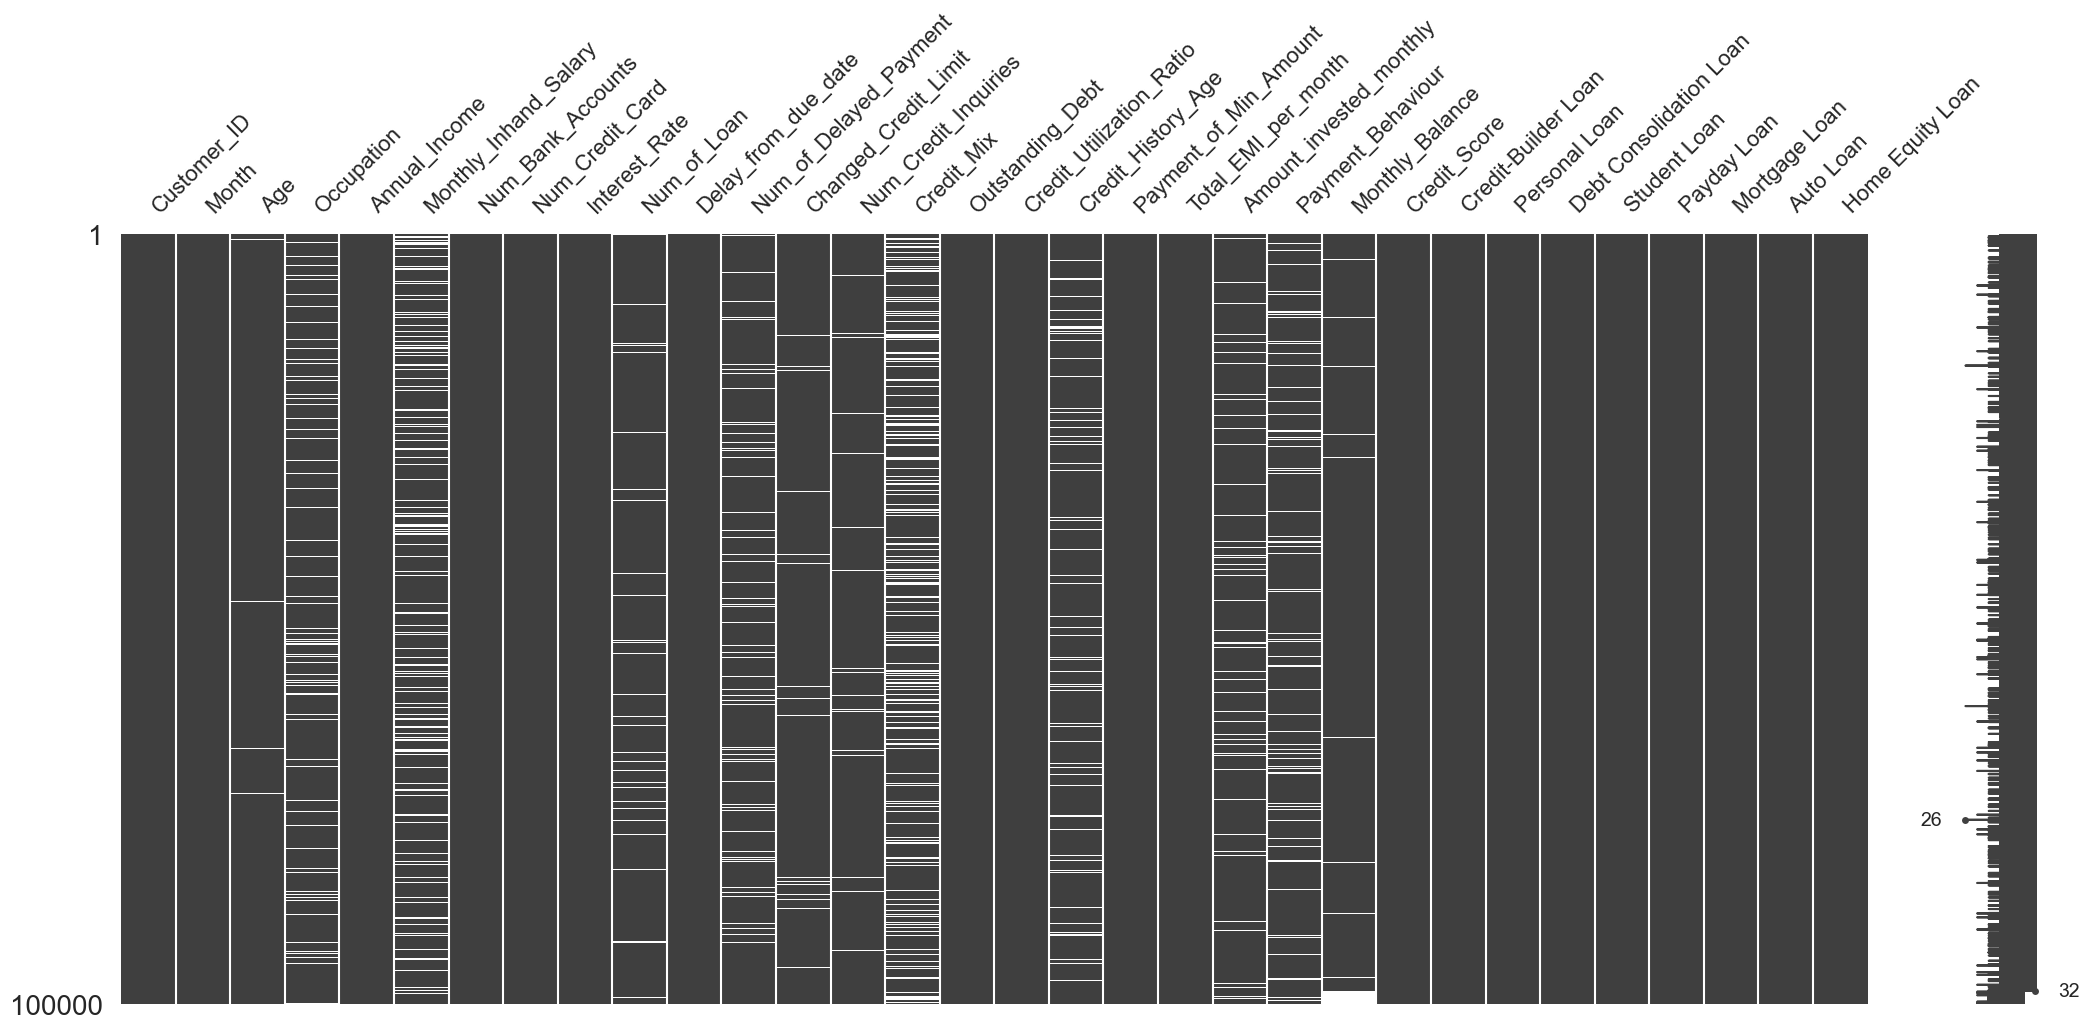

In [31]:
# visualization of missing observations
plt.figure(figsize=(10,8))
msno.matrix(data_copy)
plt.show()

<Figure size 800x600 with 0 Axes>

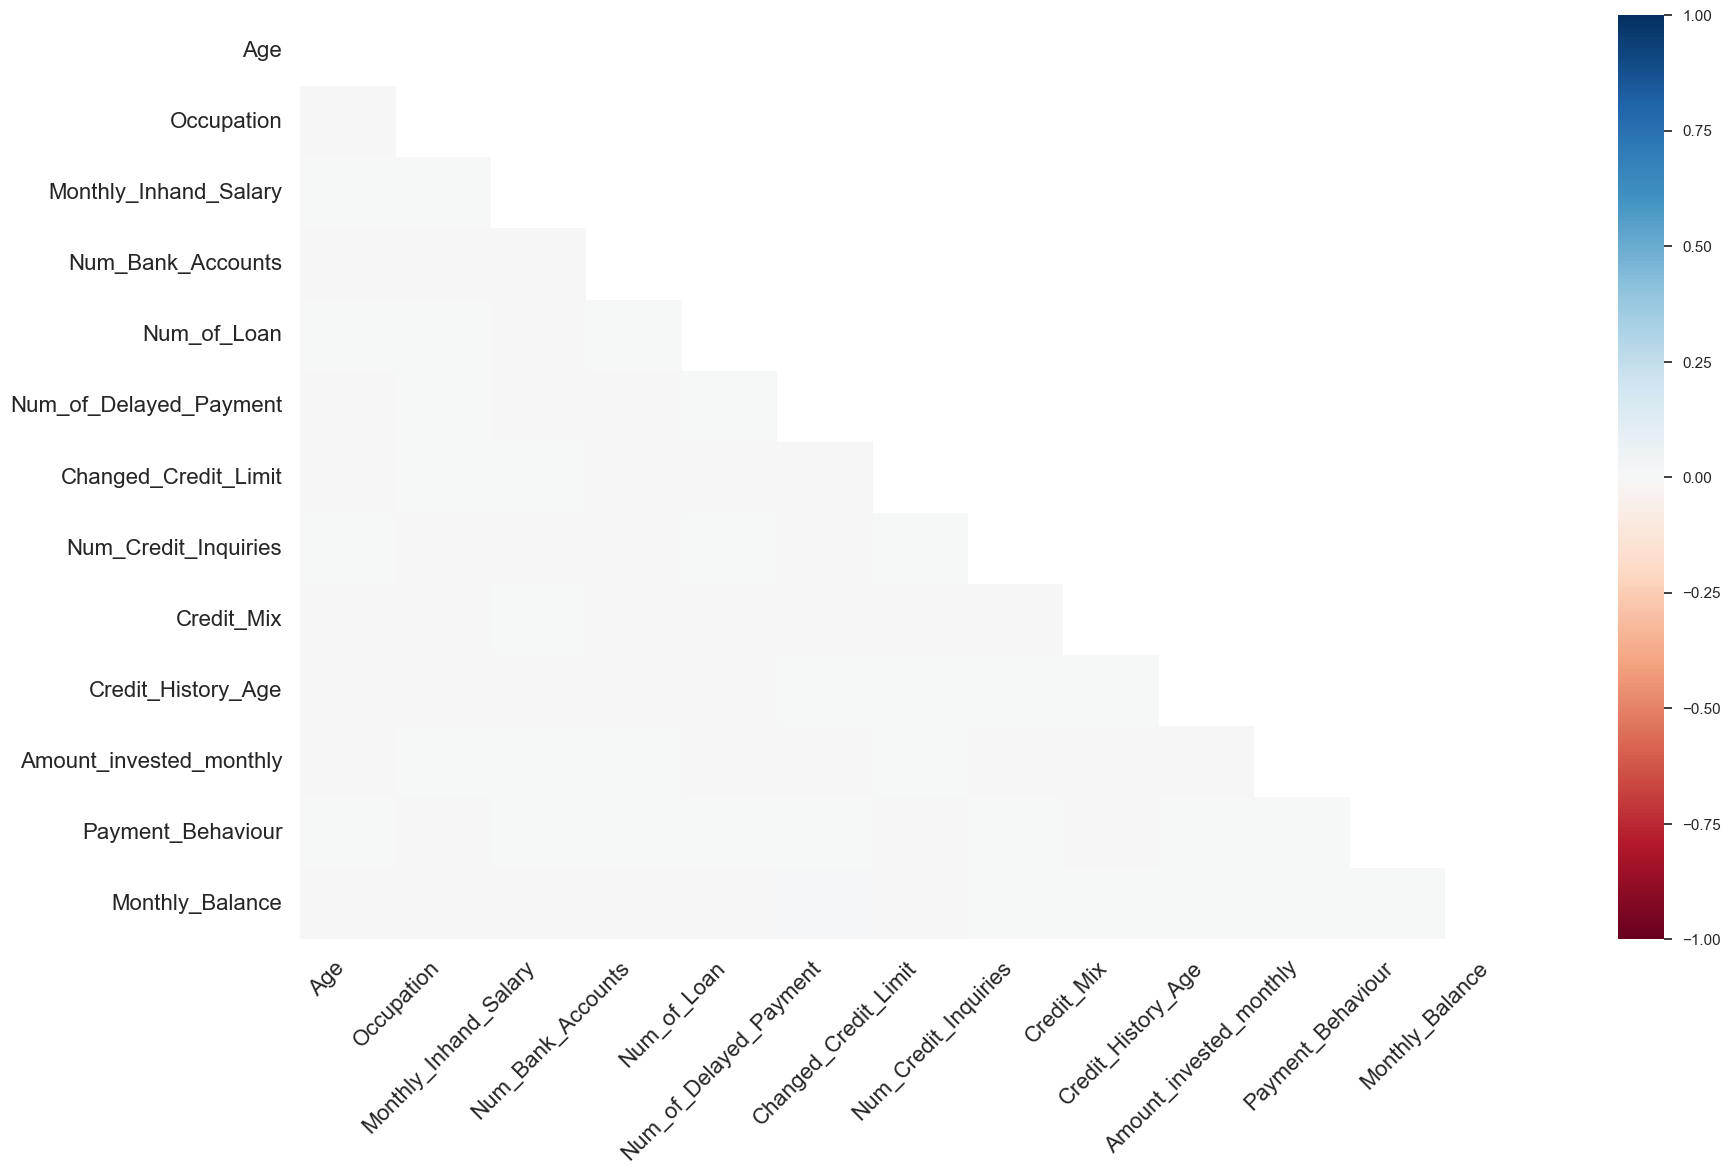

In [32]:
# Missing value correlation map
plt.figure(figsize=(8,6))
msno.heatmap(data_copy)
plt.show()

Correlations between null values of variables are close to 0

<a id="7"></a>
### Handling Missing Value for Categorical Variables

* We will fill the categorical empty values with the mode of the values of the variables corresponding to each customer.

In [33]:
def fill_na_cat(data, val):
    index_nan=list(data[val][data[val].isnull()].index)
    for i in index_nan:
        val_pred=data[val][data["Customer_ID"]==data.iloc[i]["Customer_ID"]].mode()[0]
        val_mode=data[val].mode()[0]
        if not pd.isna(val_pred):
            data[val].iloc[i]=val_pred
        else:
            data[val].iloc[i]=val_mode
    return list(data[val])

In [34]:
data_copy.select_dtypes(include="object").columns

Index(['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [35]:
## fill nan values for category variables
data_copy["Occupation"]=fill_na_cat(data=data_copy,val="Occupation")
data_copy["Credit_Mix"]=fill_na_cat(data=data_copy,val="Credit_Mix")
data_copy["Payment_Behaviour"]=fill_na_cat(data=data_copy,val="Payment_Behaviour")
data_copy.isnull().sum()

Customer_ID                     0
Month                           0
Age                           886
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts              21
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  3876
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              2868
Credit_Score                    0
Credit-Builder Loan             0
Personal Loan                   0
Debt Consolidation Loan         0
Student Loan                    0
Payday Loan                     0
Mortgage Loan 

<a id="8"></a>
### Handling Missing Value for Numerical Variables

In [36]:
def fill_na_num(data, val):
    index_nan=list(data[val][data[val].isnull()].index)
    for i in index_nan:
        val_pred=data[val][data["Customer_ID"]==data.iloc[i]["Customer_ID"]].median()
        val_mmedian=data[val].median()
        if not pd.isna(val_pred):
            data[val].iloc[i]=val_pred
        else:
            data[val].iloc[i]=val_mmedian
    return list(data[val])

In [37]:
data_copy["Age"]=fill_na_num(data=data_copy,val="Age")
data_copy["Monthly_Inhand_Salary"]=fill_na_num(data=data_copy,val="Monthly_Inhand_Salary")
data_copy["Num_Bank_Accounts"]=fill_na_num(data=data_copy,val="Num_Bank_Accounts")
data_copy["Num_of_Loan"]=fill_na_num(data=data_copy,val="Num_of_Loan")
data_copy["Num_of_Delayed_Payment"]=fill_na_num(data=data_copy,val="Num_of_Delayed_Payment")
data_copy["Changed_Credit_Limit"]=fill_na_num(data=data_copy,val="Changed_Credit_Limit")
data_copy["Num_Credit_Inquiries"]=fill_na_num(data=data_copy,val="Num_Credit_Inquiries")
data_copy["Credit_History_Age"]=fill_na_num(data=data_copy,val="Credit_History_Age")
data_copy["Amount_invested_monthly"]=fill_na_num(data=data_copy,val="Amount_invested_monthly")
data_copy["Monthly_Balance"]=fill_na_num(data=data_copy,val="Monthly_Balance")
data_copy.isnull().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Credit-Builder Loan         0
Personal Loan               0
Debt Consolidation Loan     0
Student Loan                0
Payday Loan                 0
Mortgage Loan               0
Auto Loan                   0
Home Equity Loan            0
dtype: int64

<a id="9"></a>
## Outlier Detection

In this section, we will handle outliers using the IQR method. Let's fill the outlier observations in continuous variables with the median value of the relevant variable.

In [38]:
num_cols=data_copy.select_dtypes(include=["int64","float64"]).columns[1:-8].tolist()
num_cols

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [39]:
len(num_cols)

17

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

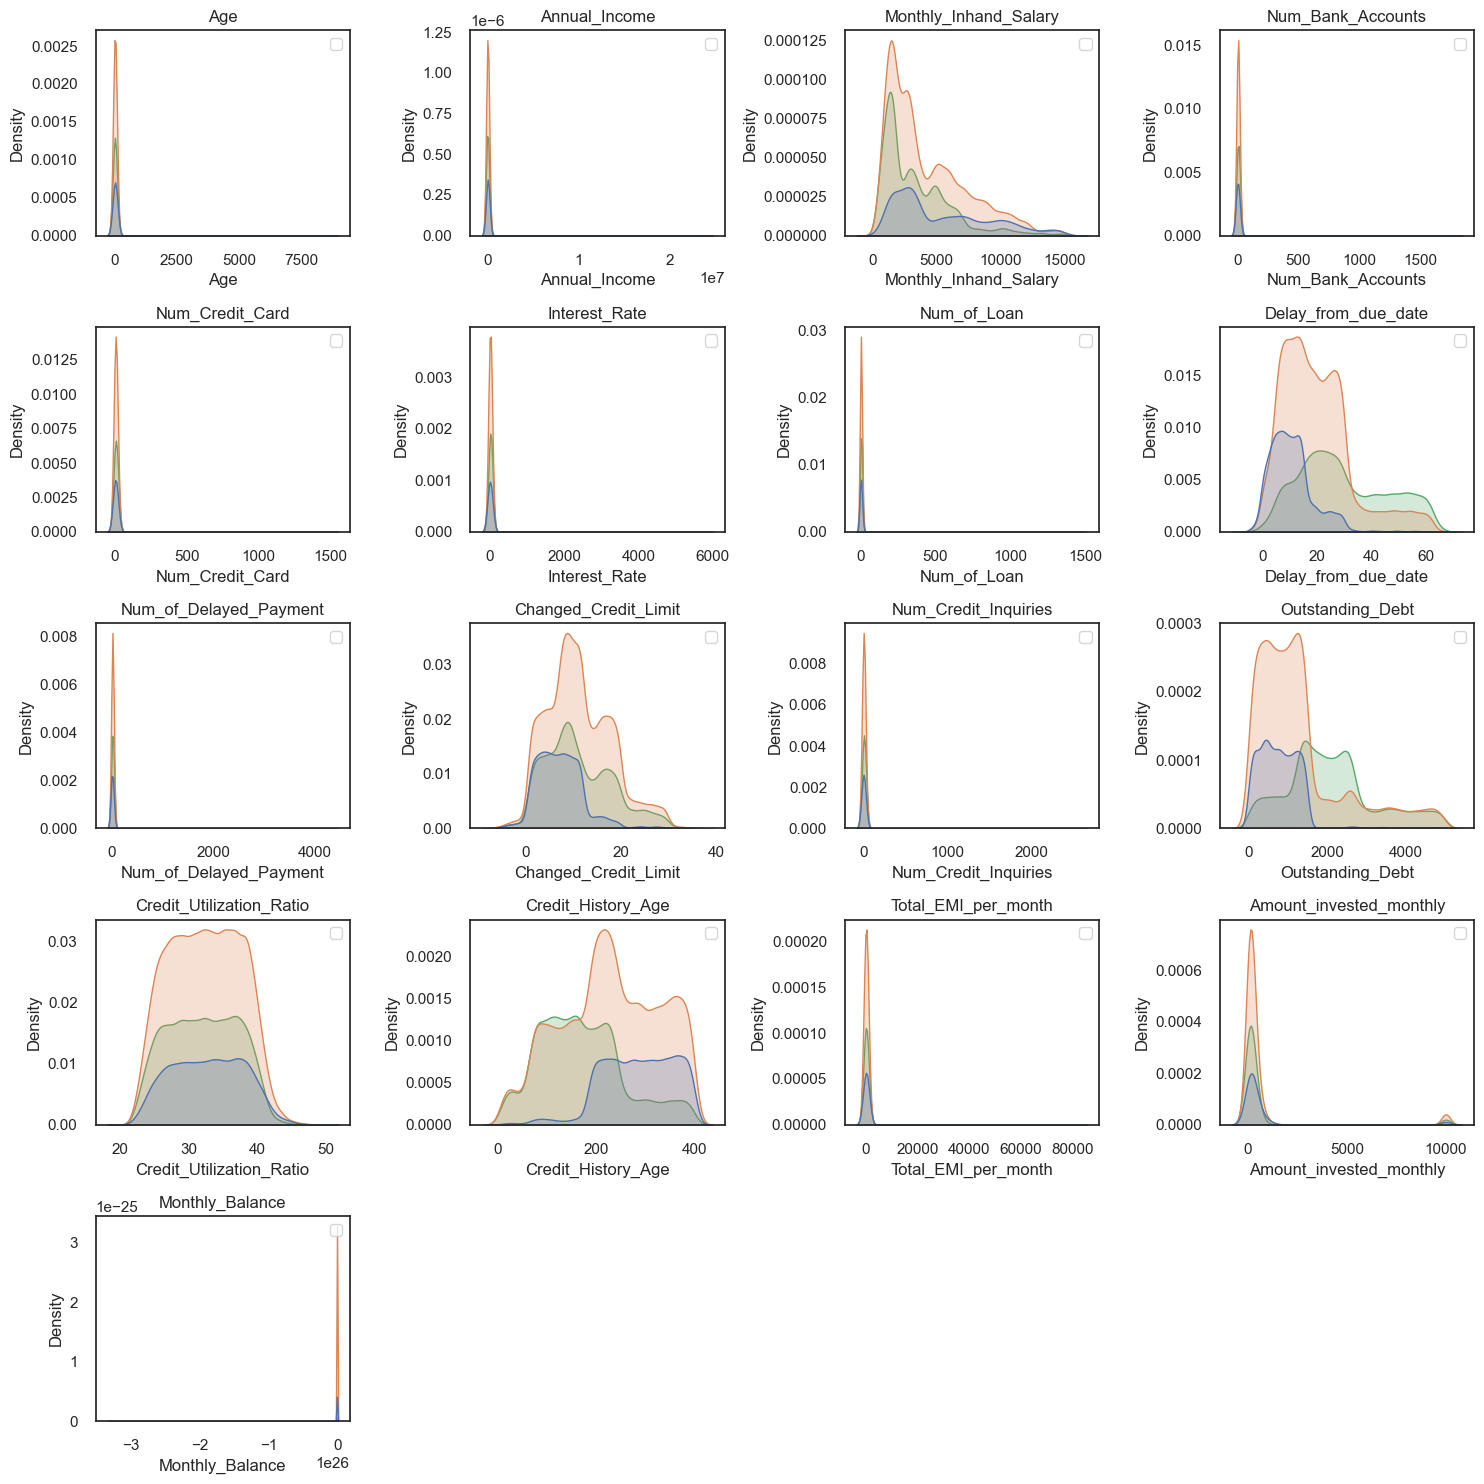

In [40]:
# Plotting histogram for each numerical variable:
plt.figure(figsize=(15,15))
for ax, col in enumerate(num_cols):
    plt.subplot(5,4, ax+1)
    plt.title(col)
    sns.kdeplot(x=data_copy[col],shade=True, hue=data_copy["Credit_Score"])
    plt.legend()

plt.tight_layout()

In [41]:
def ouitlier_thresholds(df, col_name, low_quantile=0.25, up_quantile=0.75):
    Q1=df[col_name].quantile(low_quantile)
    Q3=df[col_name].quantile(up_quantile)
    IQR=Q3-Q1
    low_limit=Q1-1.5*IQR
    up_limit=Q3+1.5*IQR
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = ouitlier_thresholds(dataframe,col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
    
# check outlier
for col in num_cols:
    print(col, check_outlier(data_copy,col))

Age True
Annual_Income True
Monthly_Inhand_Salary True
Num_Bank_Accounts True
Num_Credit_Card True
Interest_Rate True
Num_of_Loan True
Delay_from_due_date True
Num_of_Delayed_Payment True
Changed_Credit_Limit True
Num_Credit_Inquiries True
Outstanding_Debt True
Credit_Utilization_Ratio True
Credit_History_Age False
Total_EMI_per_month True
Amount_invested_monthly True
Monthly_Balance True


In [42]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = ouitlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = dataframe[variable].median()
    dataframe.loc[(dataframe[variable] > up_limit), variable] = dataframe[variable].median()
    
for col in num_cols:
    print(col, replace_with_thresholds(data_copy,col))

Age None
Annual_Income None
Monthly_Inhand_Salary None
Num_Bank_Accounts None
Num_Credit_Card None
Interest_Rate None
Num_of_Loan None
Delay_from_due_date None
Num_of_Delayed_Payment None
Changed_Credit_Limit None
Num_Credit_Inquiries None
Outstanding_Debt None
Credit_Utilization_Ratio None
Credit_History_Age None
Total_EMI_per_month None
Amount_invested_monthly None
Monthly_Balance None


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

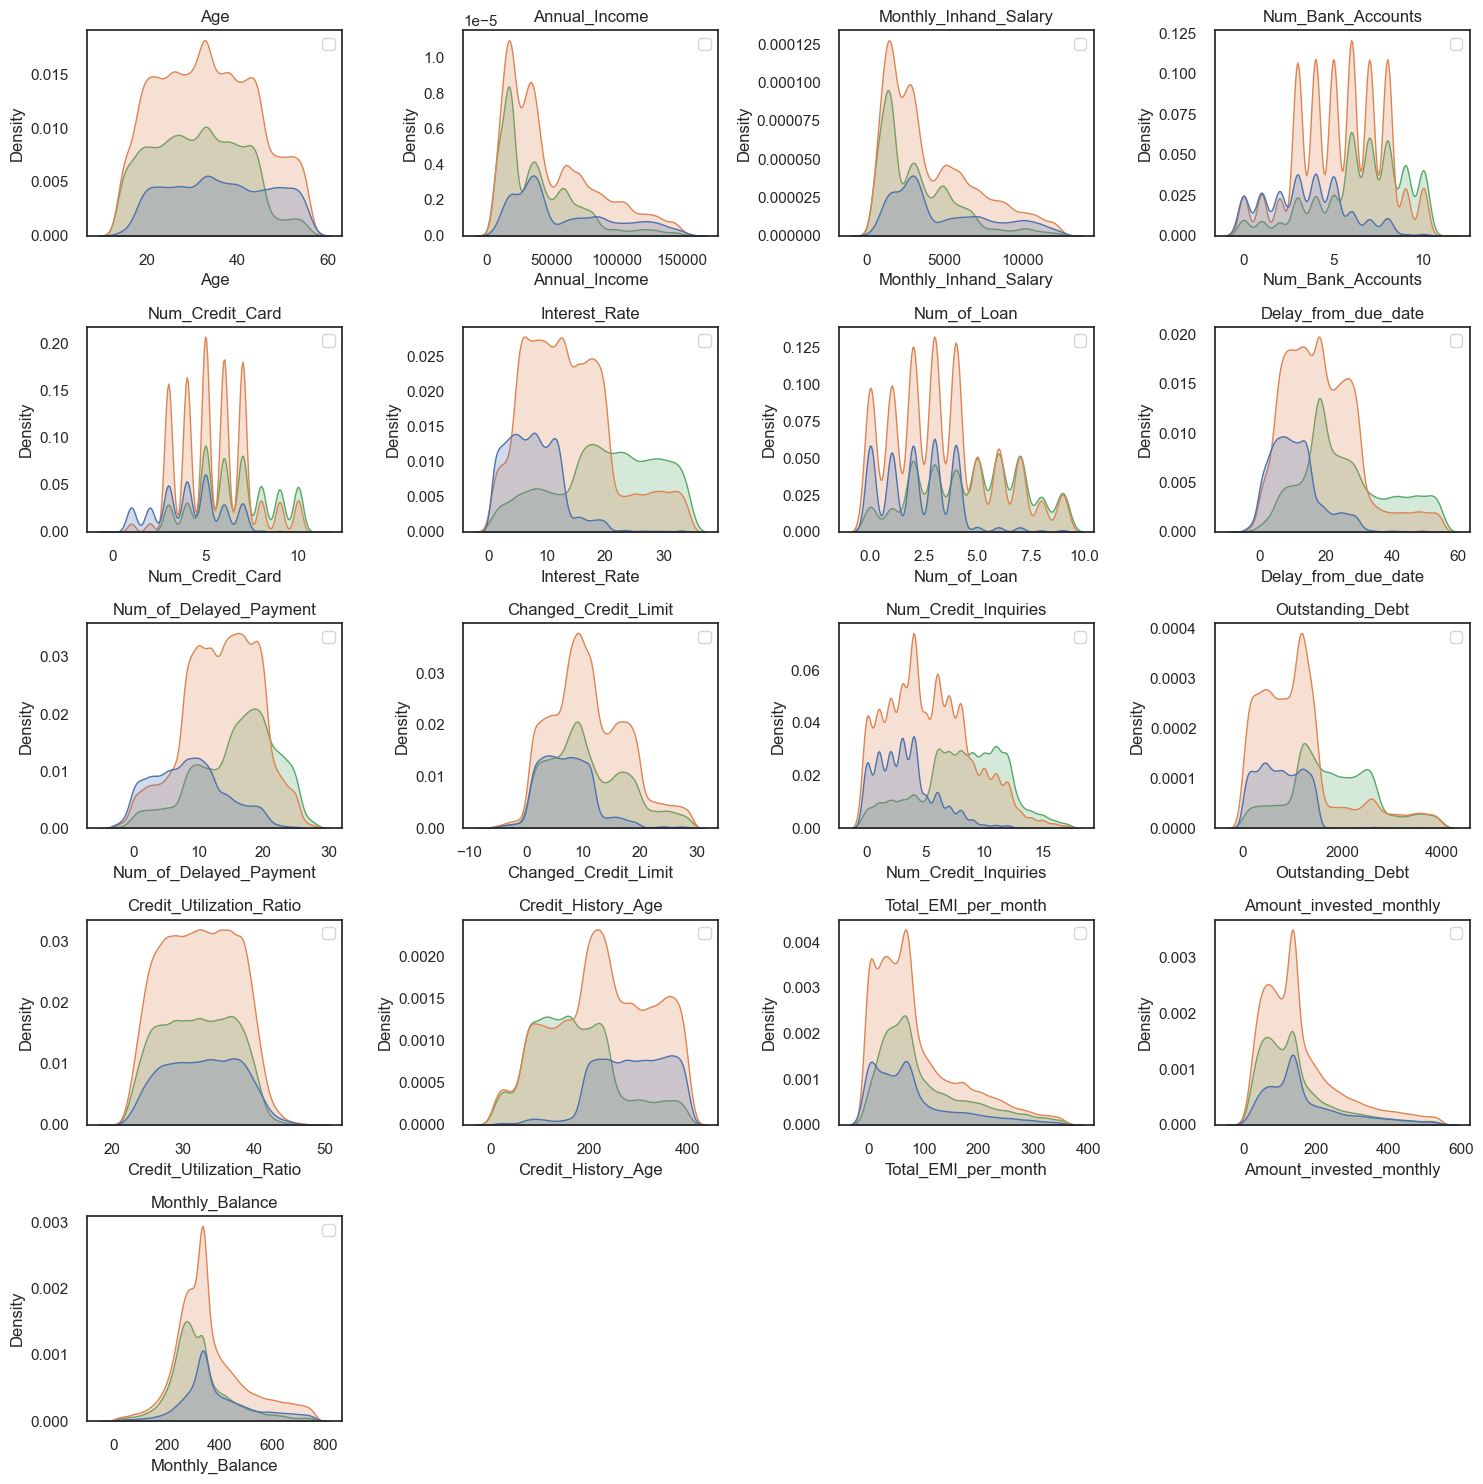

In [43]:
plt.figure(figsize=(15,15))
for ax, col in enumerate(num_cols):
    plt.subplot(5,4, ax+1)
    plt.title(col)
    sns.kdeplot(x=data_copy[col],shade=True, hue=data_copy["Credit_Score"])
    plt.legend()

plt.tight_layout()

Continuous variables in which class distinctions are evident:

* Num_Bank_Accounts
* Num_Credict_Card
* Interest_Rate
* Num_of_Loan
* Delay_from_due_date
* Num_of_Delayed_Payment
* Num_Credit_Inquiries
* Outstanding_Debt
* Credict_History_Age

<a id="10"></a>
## Examining Data Visually

In this section we will visualize categorical and numerical variables. We will examine the effects of these variables on the dependent variable. We will also examine the relationships between variables.

<a id="11"></a>
### Distribution of Credit Score

In [44]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  float64
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  float64
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

In [45]:
fig=px.pie(data_copy["Credit_Score"].value_counts().reset_index(), values="count", names="Credit_Score", title="The Distribution of Credict Score")
fig.show()


The dependent variable is evenly distributed in the data set.

In [46]:
m={
    "Poor":0,
    "Standard":1,
    "Good":2
}

data_copy["Credit_Score"]=data_copy["Credit_Score"].map(m)

<a id="12"></a>
### Countplot of Categorical Variables

In [47]:
ob_cols=data_copy.select_dtypes(include="object").columns.tolist()
ob_cols

['Month',
 'Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']

In [48]:
fig = make_subplots(rows=2, cols=2)

fig.add_trace(
    go.Bar(x=data_copy["Occupation"].value_counts().reset_index()["Occupation"], y=data_copy["Occupation"].value_counts().reset_index()["count"], name="Occupation"),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=data_copy["Credit_Mix"].value_counts().reset_index()["Credit_Mix"], y=data_copy["Credit_Mix"].value_counts().reset_index()["count"], name="Credit_Mix"),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=data_copy["Payment_of_Min_Amount"].value_counts().reset_index()["Payment_of_Min_Amount"], y=data_copy["Payment_of_Min_Amount"].value_counts().reset_index()["count"], name="Payment_of_Min_Amount"),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x=data_copy["Payment_Behaviour"].value_counts().reset_index()["Payment_Behaviour"], y=data_copy["Payment_Behaviour"].value_counts().reset_index()["count"], name="Payment_Behaviour"),
    row=2, col=2
)

fig.update_layout(height=600, width=800, title_text="Countplot")
fig.show()

<a id="13"></a>
### Relationship of Categorical Variables to Dependent Variable

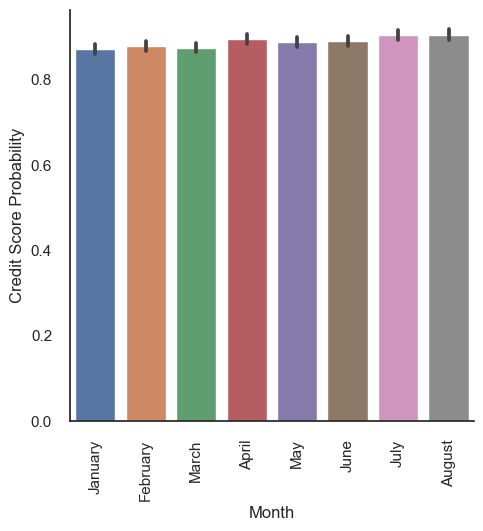

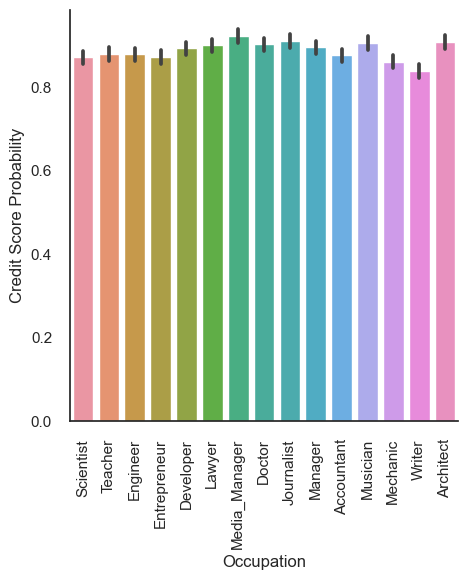

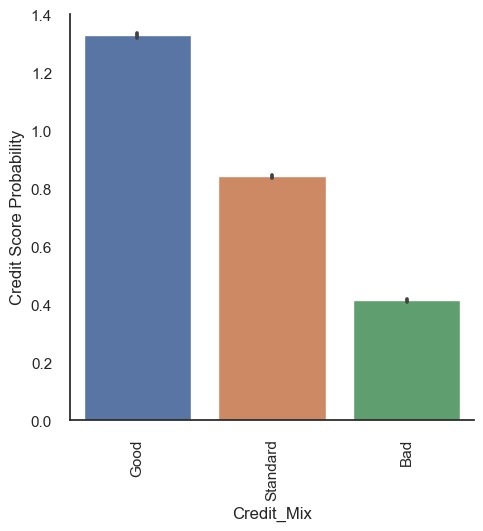

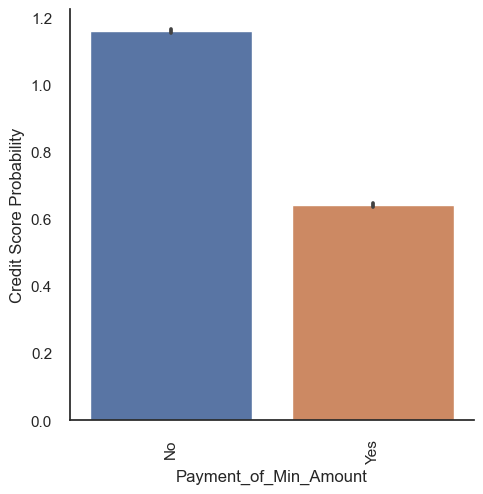

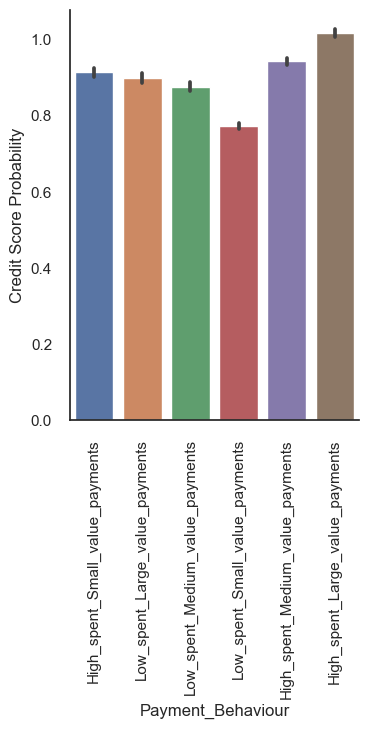

In [49]:
def cat_plot(x):
    g=sns.catplot(x=x, y="Credit_Score", data=data_copy, kind="bar")
    g.set_ylabels("Credit Score Probability")
    g.set_xticklabels(rotation=90)

    plt.show()

for i in ob_cols:
    cat_plot(i)

* Credit score averages are close to each other in the month, occupation and payment behavior variable groups.
* In credit mix and payment of min amount, the distinction between credit score averages according to groups is clear.
* Let's gather the groups whose credit score averages are close to each other in variable Paymen Behaviour into a single group.

In [50]:
data_copy["Payment_Behaviour"].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

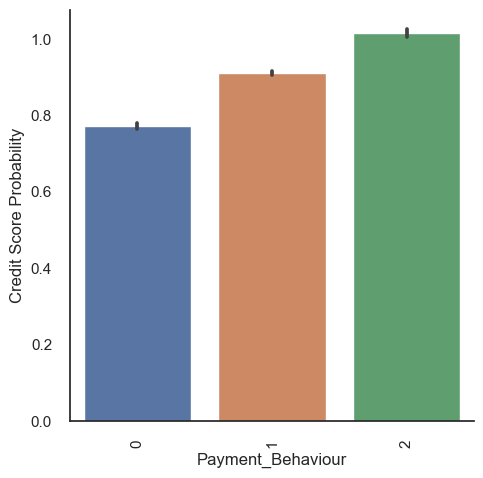

In [51]:
data_copy["Payment_Behaviour"]=[0 if i=="Low_spent_Small_value_payments" else 2 if i=="High_spent_Large_value_payments" else 1 for i in data_copy["Payment_Behaviour"]]
data_copy["Payment_Behaviour"]=data_copy["Payment_Behaviour"].astype("object")

g=sns.catplot(x="Payment_Behaviour", y="Credit_Score", data=data_copy, kind="bar")
g.set_ylabels("Credit Score Probability")
g.set_xticklabels(rotation=90)

<a id="14"></a>
#### Chi-square Test of Independence
Let's examine the relationship of categorical variables with the dependent variable with the chi-square test:

* H0: There is no relationship between two variables.
* H1: There is a relationship between two variables.

In [52]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  float64
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  float64
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

In [53]:
ob_cols2=["Month","Occupation","Credit_Mix","Payment_of_Min_Amount","Payment_Behaviour","Credit-Builder Loan",
         "Personal Loan","Debt Consolidation Loan","Student Loan","Payday Loan","Mortgage Loan","Auto Loan","Home Equity Loan","Credit_Score"]
df_2=data_copy[ob_cols2]
df_2["Credit_Score"]=data_copy["Credit_Score"]
df_2.head()

Month Occupation Credit_Mix Payment_of_Min_Amount Payment_Behaviour  \
0   January  Scientist       Good                    No                 1   
1  February  Scientist       Good                    No                 1   
2     March  Scientist       Good                    No                 1   
3     April  Scientist       Good                    No                 0   
4       May  Scientist       Good                    No                 1   

   Credit-Builder Loan  Personal Loan  Debt Consolidation Loan  Student Loan  \
0                  1.0            1.0                      0.0           0.0   
1                  1.0            1.0                      0.0           0.0   
2                  1.0            1.0                      0.0           0.0   
3                  1.0            1.0                      0.0           0.0   
4                  1.0            1.0                      0.0           0.0   

   Payday Loan  Mortgage Loan  Auto Loan  Home Equity Loan  Credit_Score  
0          0.0            0.0        1.0               1.0             2  
1          0.0            0.0        1.0               1.0             2  
2          0.0            0.0        1.0               1.0             2  
3          0.0            0.0        1.0               1.0             2  
4          0.0            0.0        1.0               1.0             2

In [54]:
def chi_square_test(data, val1, val2):
    occ=data[[val1,val2]]
    table1=pd.crosstab(index=occ[val1], columns=occ[val2]) # Calculate Frequency
    t,p,sd,expected=stats.chi2_contingency(table1) # Finding the expected frequency
    for i in expected.reshape(-1,1):
        if i<25:
            t,p,sd,expected=stats.chi2_contingency(table1,correction=True) # Yates chi square test
            break
            return (t,p)
        else:
            t,p,sd,expected=stats.chi2_contingency(table1,correction=False) # Pearson chi square test
            return (t,p)

In [55]:
var=[]
t=[]
p=[]

for i in df_2.columns[:-1].tolist():
    var.append(i)
    t.append(round(chi_square_test(df_2,i,"Credit_Score")[0],2))
    p.append(round(chi_square_test(df_2,i,"Credit_Score")[1],2))
    
df1=pd.DataFrame()
df1["Variable"]=var
df1["Test"]=t
df1["Pvalue"]=p

df1=df1.sort_values(by="Test",ascending=False)
df1

Variable      Test  Pvalue
2                Credit_Mix  40489.42     0.0
3     Payment_of_Min_Amount  16869.96     0.0
4         Payment_Behaviour   1427.94     0.0
11                Auto Loan   1251.14     0.0
6             Personal Loan   1070.70     0.0
9               Payday Loan   1021.91     0.0
5       Credit-Builder Loan   1014.97     0.0
8              Student Loan    982.29     0.0
7   Debt Consolidation Loan    948.89     0.0
10            Mortgage Loan    924.20     0.0
12         Home Equity Loan    855.10     0.0
0                     Month    201.81     0.0
1                Occupation    180.69     0.0

* We will remove two variables with low test values from the data set.

In [56]:
data_copy.drop(["Month","Occupation"],axis=1,inplace=True)

* Effects of loan types on the dependent variable:

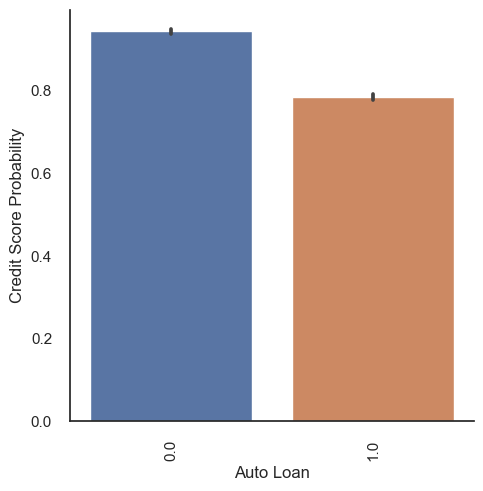

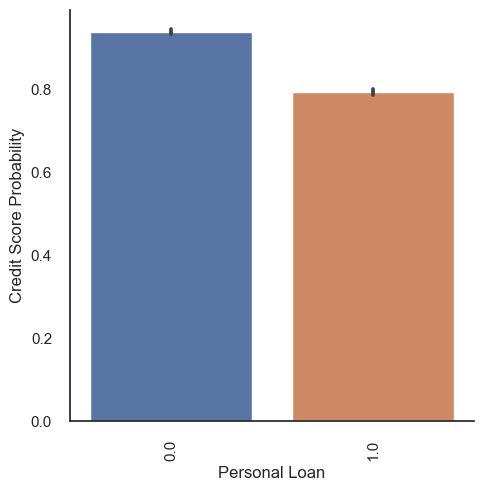

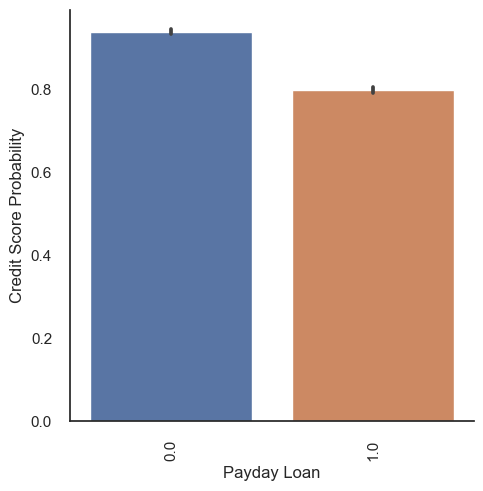

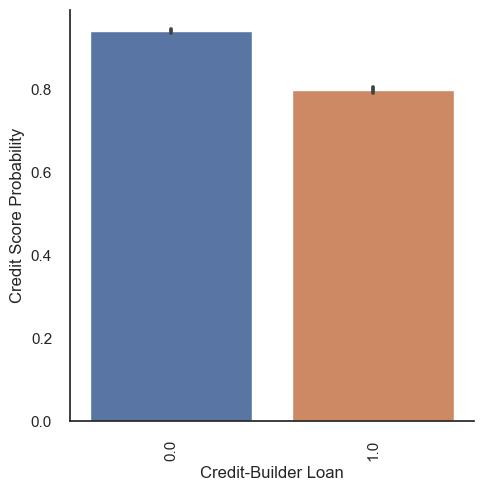

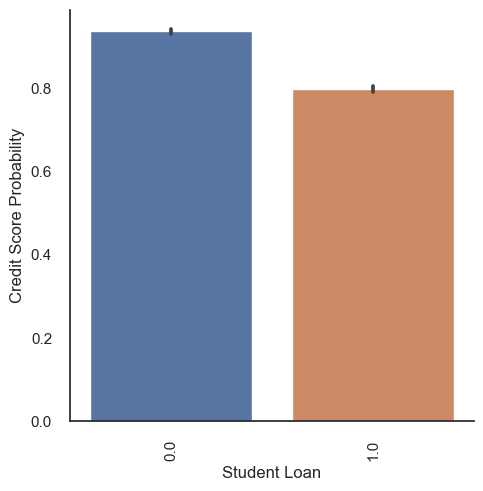

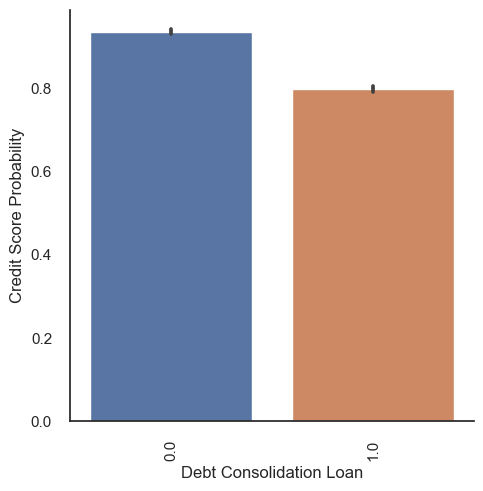

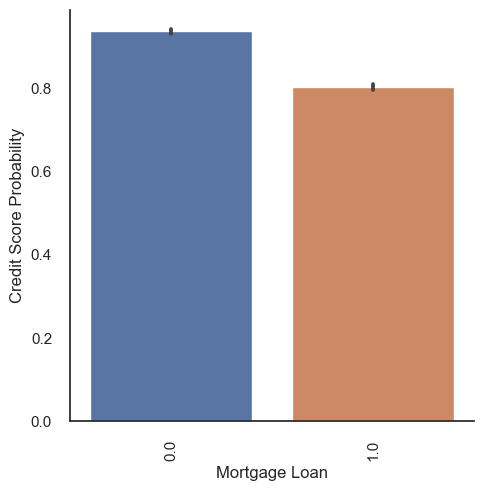

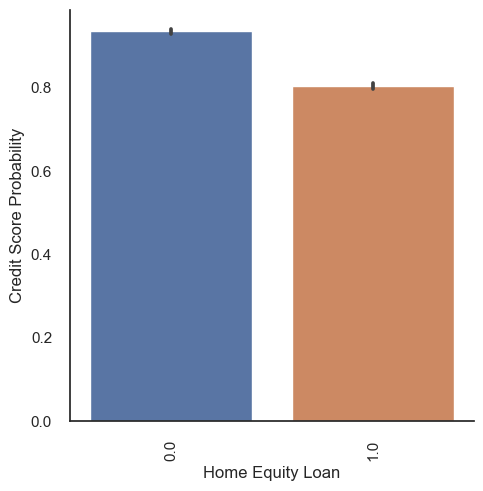

In [57]:
for i in df1["Variable"].values[3:-2].tolist():
    cat_plot(i)

<a id="15"></a>
### Relationship of Numerical Variables to Dependent Variable

In this section, we will examine whether numerical independent variables have an effect on the dependent variable using box plots and anaova tests.

In [58]:
df_numeric=data_copy.select_dtypes(include=["float","int"])
df_numeric.columns[:-8]

Index(['Customer_ID', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [59]:
df_numeric=df_numeric[df_numeric.columns[1:-8]]
df_numeric.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

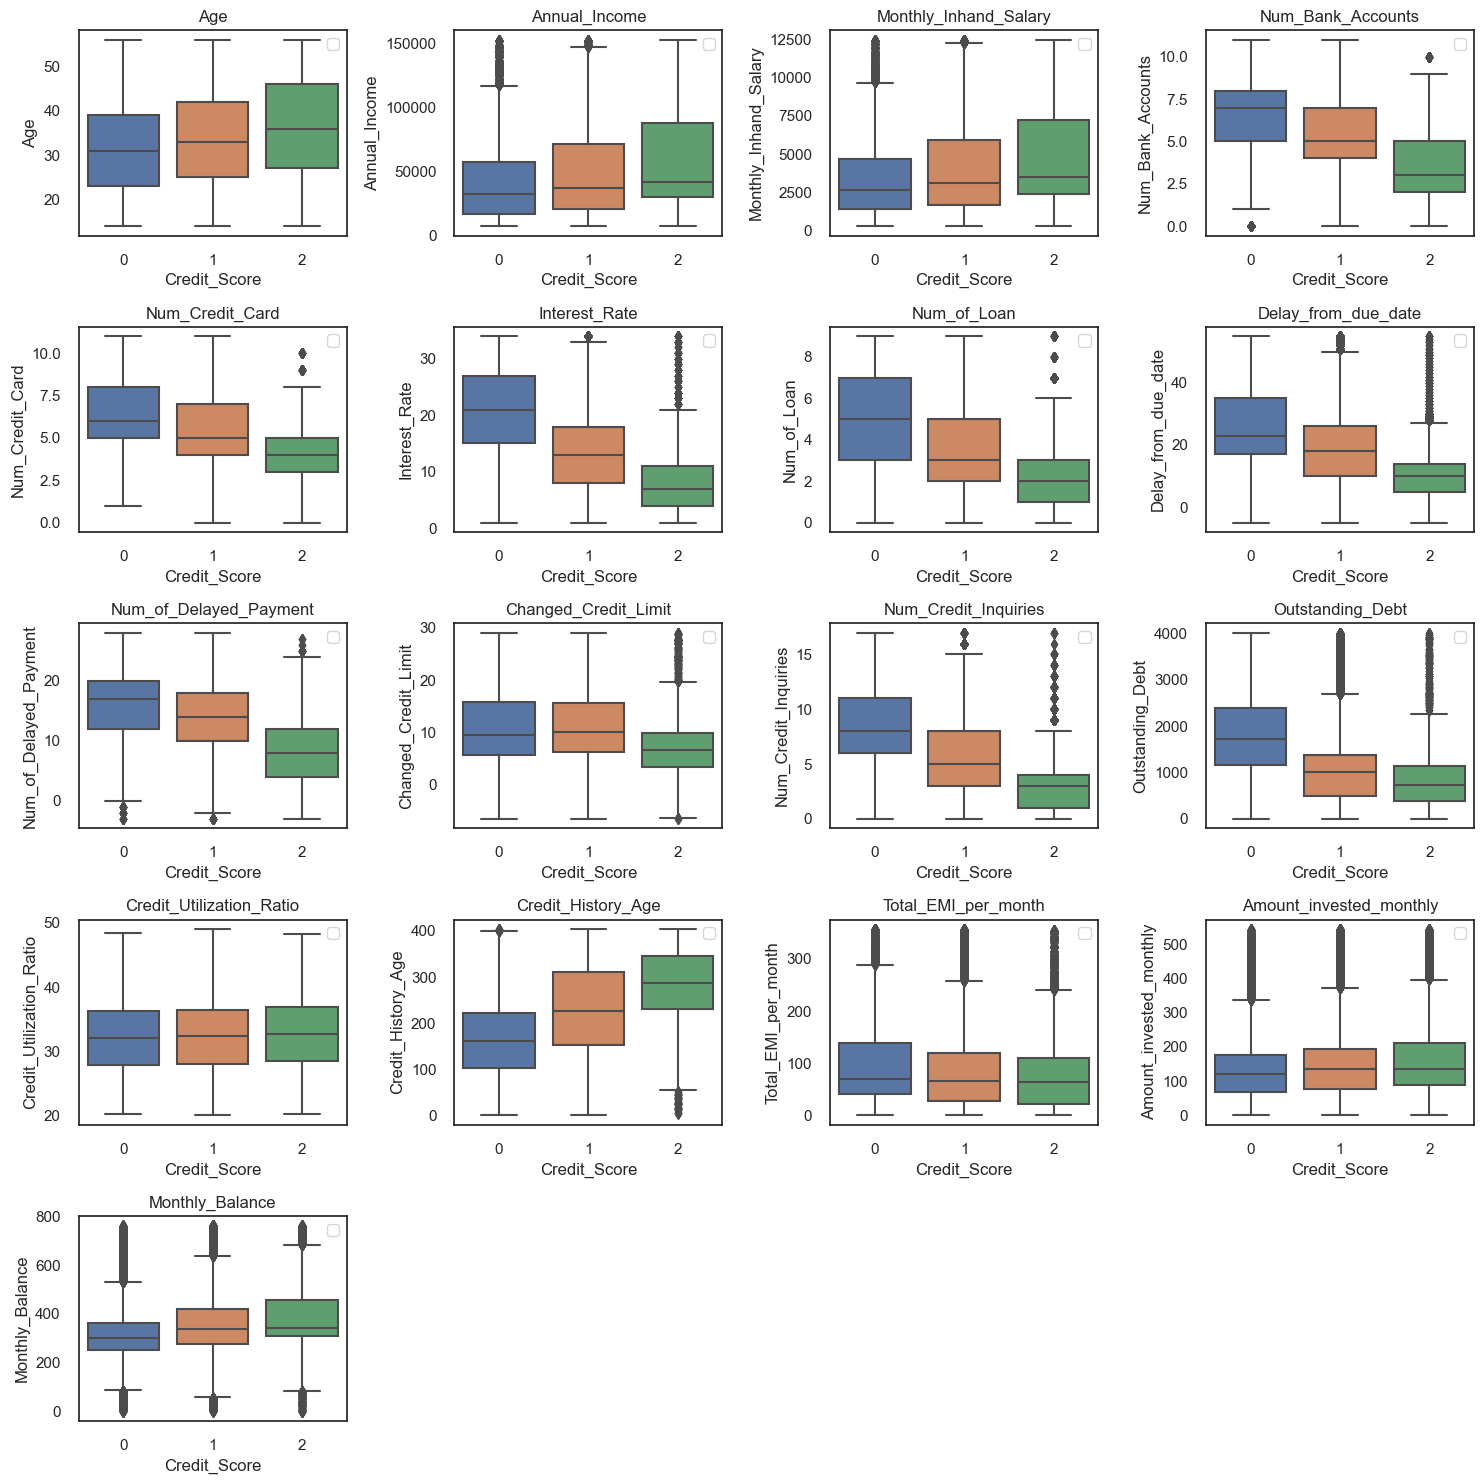

In [60]:
plt.figure(figsize=(15,15))
for ax, col in enumerate(df_numeric.columns[:-1]):
    plt.subplot(5,4, ax+1)
    plt.title(col)
    sns.boxplot(x="Credit_Score", y=col, data=df_numeric)
    plt.legend()

plt.tight_layout()

* In the dependent variable distinction, the median values of variables Credit Utilization, Total EMI per month and Amount invested monthly are very close to each other.

<a id="16"></a>
#### One Way ANOVA Test

* With the ANOVA test, it is tested statistically whether the averages between at least two groups are different.
* There is an assumption of normality and homogeneity of variances. Since the number of data is large, it is assumed that the data is normally distributed according to the central limit theorem. We will test whether the variances are homogeneous. If it is not homogeneous, we will use a non-parametric anova test.
* H0: u1=u2=...=un
* H1: u1!=u2!=..!=un

Homogeneity of variances test

* H0: Variances are homogeneous
* H1: Variances are not homogeneous

In [61]:
def homogeneity(data,var1,var2):
    df=data[[var1,var2]]
    df_melted=pd.melt(df,id_vars=var2,var_name=var1,value_name="value")
    g1=df_melted[df_melted[var2]==0]
    g2=df_melted[df_melted[var2]==1]
    g3=df_melted[df_melted[var2]==2]
    homogeneity_test=stats.bartlett(g1["value"],g2["value"],g3["value"])
    return homogeneity_test

In [62]:
var=[]
t=[]
p=[]
for i in df_numeric.columns[:-1]:
    var.append(i)
    t.append(round(homogeneity(data_copy,i,"Credit_Score")[0],2))
    p.append(round(homogeneity(data_copy,i,"Credit_Score")[1],2))

df2=pd.DataFrame()
df2["Variable"]=var
df2["Test"]=t
df2["Pvalue"]=p

df2=df2.sort_values(by="Test",ascending=False)
df2

Variable     Test  Pvalue
5              Interest_Rate  6738.52     0.0
11          Outstanding_Debt  5896.80     0.0
7        Delay_from_due_date  5341.09     0.0
6                Num_of_Loan  3487.60     0.0
10      Num_Credit_Inquiries  2910.76     0.0
9       Changed_Credit_Limit  2689.56     0.0
13        Credit_History_Age  2394.24     0.0
1              Annual_Income  1890.72     0.0
2      Monthly_Inhand_Salary  1820.59     0.0
16           Monthly_Balance   970.28     0.0
0                        Age   322.73     0.0
3          Num_Bank_Accounts   289.75     0.0
4            Num_Credit_Card   282.97     0.0
8     Num_of_Delayed_Payment   275.68     0.0
15   Amount_invested_monthly   210.17     0.0
12  Credit_Utilization_Ratio    20.07     0.0
14       Total_EMI_per_month    16.58     0.0

All p values are less than 0.05. Variances are not distributed homogeneously. We will apply Welchin ANOVA test.

In [63]:
def anova_test(data,var1,var2):
    df=data[[var1,var2]]
    df_melted=pd.melt(df,id_vars=var2,var_name=var1,value_name="value")
    test=pg.welch_anova(data=df_melted, dv="value", between=var2)
    return test

In [64]:
var=[]
t=[]
p=[]
for i in df_numeric.columns[:-1]:
    var.append(i)
    t.append(round(float(anova_test(data_copy,i,"Credit_Score")["F"].values),2))
    p.append(round(float(anova_test(data_copy,i,"Credit_Score")["p-unc"].values),2))

df3=pd.DataFrame()
df3["Variable"]=var
df3["Test"]=t
df3["Pvalue"]=p

df3=df3.sort_values(by="Test",ascending=False)
df3

Variable      Test  Pvalue
5              Interest_Rate  19479.64     0.0
10      Num_Credit_Inquiries  13625.59     0.0
11          Outstanding_Debt  12196.47     0.0
7        Delay_from_due_date  12101.38     0.0
13        Credit_History_Age  11650.02     0.0
3          Num_Bank_Accounts   9561.76     0.0
4            Num_Credit_Card   9353.31     0.0
6                Num_of_Loan   9067.38     0.0
8     Num_of_Delayed_Payment   8808.89     0.0
9       Changed_Credit_Limit   3966.75     0.0
1              Annual_Income   1971.21     0.0
2      Monthly_Inhand_Salary   1930.45     0.0
16           Monthly_Balance   1705.64     0.0
0                        Age   1302.58     0.0
14       Total_EMI_per_month    346.05     0.0
15   Amount_invested_monthly    319.65     0.0
12  Credit_Utilization_Ratio    104.04     0.0

* p values <0. The H0 hypothesis is rejected in all of them. In the independent variables, at least one of the dependent variable groups is different.
* Let's examine the variables with low Anova test values in the categorical variables breakdown:

<Figure size 2000x2000 with 0 Axes>

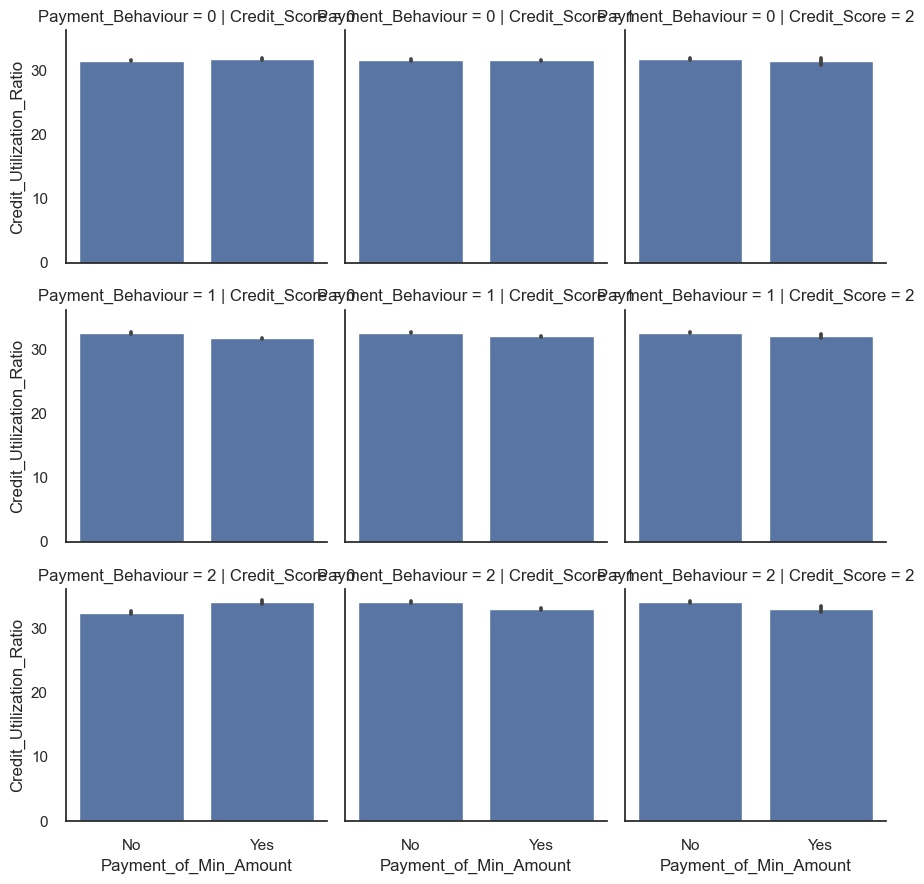

In [65]:
plt.figure(figsize=(20,20))
g=sns.FacetGrid(data_copy,row="Payment_Behaviour", col="Credit_Score")
g.map(sns.barplot, "Payment_of_Min_Amount", "Credit_Utilization_Ratio")
g.add_legend()
plt.tight_layout()
plt.show()

* No clear distinction can be made.

<Figure size 2000x2000 with 0 Axes>

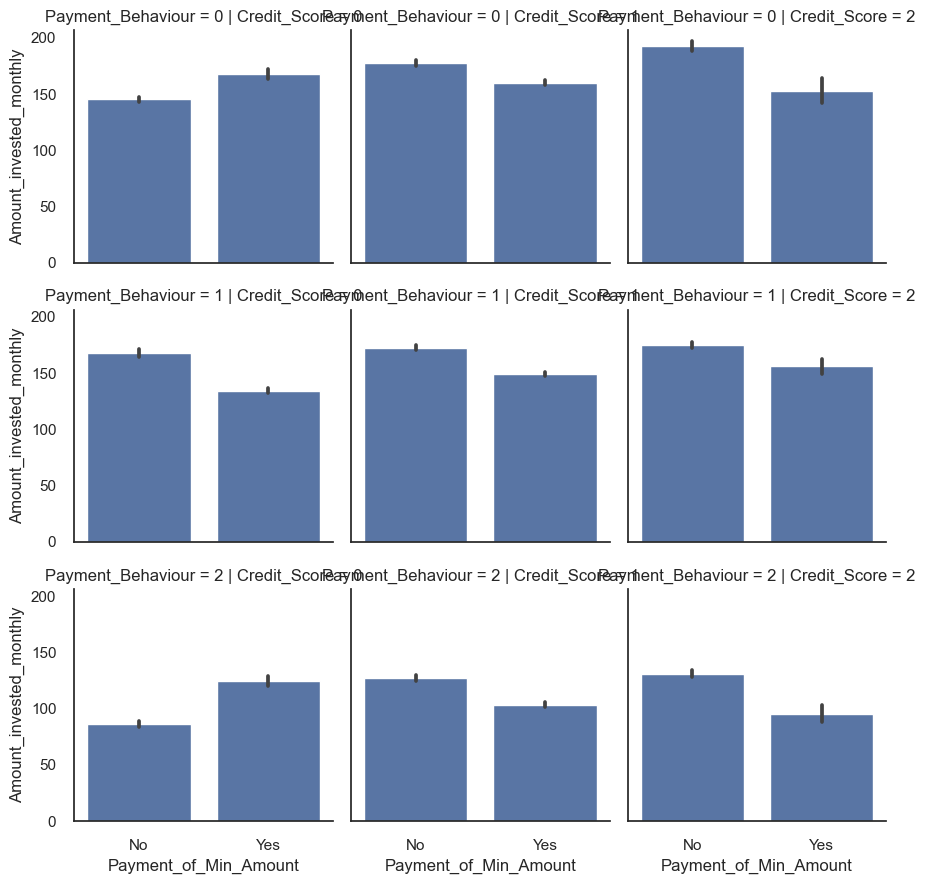

In [66]:
plt.figure(figsize=(20,20))
g=sns.FacetGrid(data_copy,row="Payment_Behaviour", col="Credit_Score")
g.map(sns.barplot, "Payment_of_Min_Amount", "Amount_invested_monthly")
g.add_legend()
plt.tight_layout()
plt.show()

* Here the distinctions become clearer. For example, if the person has paid the minimum amount he/she has to pay and has a payment behavior that we classify as 0, if the amount he deposited is around 150, his credit score is classified as 2.

<Figure size 2000x2000 with 0 Axes>

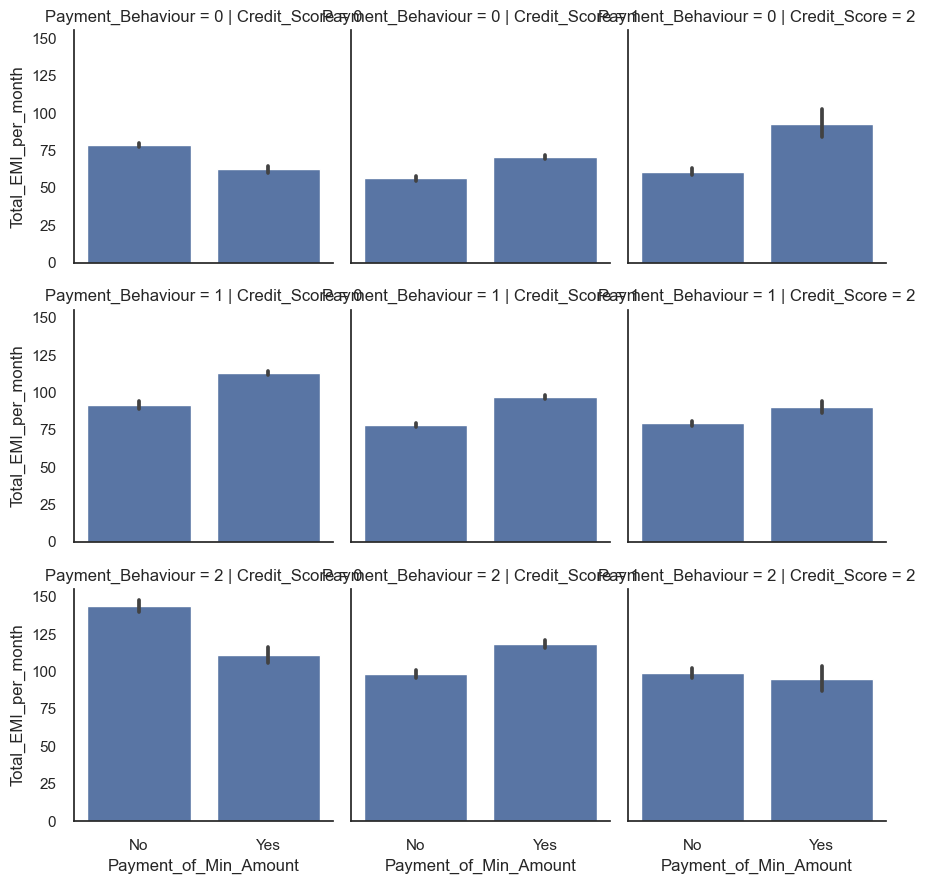

In [67]:
plt.figure(figsize=(20,20))
g=sns.FacetGrid(data_copy,row="Payment_Behaviour", col="Credit_Score")
g.map(sns.barplot, "Payment_of_Min_Amount", "Total_EMI_per_month")
g.add_legend()
plt.tight_layout()
plt.show()

* Here the distinctions become clearer. Since the Anova test statistics are very small, let's still remove these three variables from the data set.

In [68]:
data_copy.drop(df3["Variable"].values[-3:].tolist(),axis=1,inplace=True)

<a id="17"></a>
## Exploratory Data Analysis

### 1) Customers who delay their debts the most:

In [69]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              100000 non-null  float64
 1   Age                      100000 non-null  float64
 2   Annual_Income            100000 non-null  float64
 3   Monthly_Inhand_Salary    100000 non-null  float64
 4   Num_Bank_Accounts        100000 non-null  float64
 5   Num_Credit_Card          100000 non-null  int64  
 6   Interest_Rate            100000 non-null  int64  
 7   Num_of_Loan              100000 non-null  float64
 8   Delay_from_due_date      100000 non-null  int64  
 9   Num_of_Delayed_Payment   100000 non-null  float64
 10  Changed_Credit_Limit     100000 non-null  float64
 11  Num_Credit_Inquiries     100000 non-null  float64
 12  Credit_Mix               100000 non-null  object 
 13  Outstanding_Debt         100000 non-null  float64
 14  Credi

In [70]:
ds=pd.DataFrame(data_copy.groupby("Customer_ID")["Outstanding_Debt"].mean().sort_values(ascending=False)).reset_index()[:30]
ds["Customer_ID"]=ds["Customer_ID"].astype("int")
ds["Customer_ID"]=ds["Customer_ID"].astype("object")

ci=[]
for i in ds["Customer_ID"]:
    ci.append("No: {}".format(str(i)))
ds["Customer_ID"]=ci

In [71]:
fig = go.Figure(go.Bar(x=ds["Customer_ID"],
                       y=ds["Outstanding_Debt"],
                      marker=dict(color=ds["Outstanding_Debt"],
                                 colorscale="bluered")))

fig.update_layout(title="Customers who delay their debts the most",
                 xaxis_title="Top 15 Customer", yaxis_title="Top 15 Mean of Outstanding Debt",hovermode="x")
fig.show()

### 2) Relationship between outstanding balance and credit card interest rate on a customer basis

In [72]:
ds=pd.DataFrame(data_copy.groupby("Customer_ID")[["Outstanding_Debt","Interest_Rate"]].mean().sort_values(by="Outstanding_Debt",ascending=False)).reset_index()[:30]
ds["Customer_ID"]=ds["Customer_ID"].astype("int")
ds["Customer_ID"]=ds["Customer_ID"].astype("object")

ci=[]
for i in ds["Customer_ID"]:
    ci.append("No: {}".format(str(i)))
ds["Customer_ID"]=ci
# To visualize we will apply normalization
scaler=StandardScaler()
ds[["Outstanding_Debt","Interest_Rate"]]=scaler.fit_transform(ds[["Outstanding_Debt","Interest_Rate"]])


In [73]:
# Creating tracel
trace1=go.Scatter(
    x=ds["Customer_ID"],
    y=ds["Outstanding_Debt"],
    mode="lines",
    name="Outstanding_Debt",
    marker=dict(color="rgba(16,112,2,0.8)"),
    text=ds["Customer_ID"] 
)

# Creating tracel2
trace2=go.Scatter(
    x=ds["Customer_ID"],
    y=ds["Interest_Rate"],
    mode="lines+markers",
    name="Interest_Rate",
    marker=dict(color="rgba(20,26,20,0.8)"),
    text=ds["Customer_ID"]
)

data2=[trace1,trace2]
layout=dict(title="Relationship between outstanding balance and credit card interest rate on a customer basis",
           xaxis=dict(title="Customer_ID Rank",ticklen=5,zeroline=False)
           )

fig=dict(data=data2, layout=layout)
iplot(fig)

### 3) Delay_from_due_date -- Outstanding_Debt -- Credit_History_Age for Low_spent_Small_value_payments

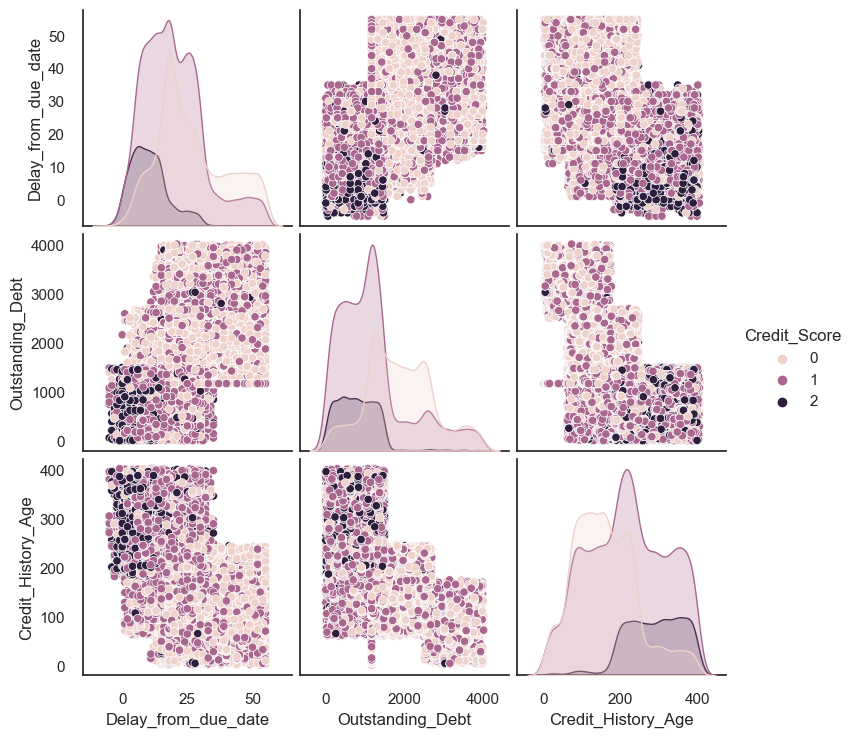

In [74]:
lssvp=data_copy[data_copy["Payment_Behaviour"]==0][["Delay_from_due_date","Outstanding_Debt","Credit_History_Age","Credit_Score"]]

sns.pairplot(lssvp, hue="Credit_Score", diag_kind="kde")
plt.show()

* Among customers who make small payments, those with unpaid debts over 1700 have a weak credit score.
* In the distribution of independent variables, we observe regions where groups of dependent variables cluster.

### 4) Annual Income and Log Outstanding Dept by Credit Score for each Number of Loan

In [75]:
df4=data_copy[["Num_of_Loan","Annual_Income","Outstanding_Debt","Credit_History_Age","Credit_Mix","Credit_Score"]].copy()
df4["Num_of_Loan"]=df4["Num_of_Loan"].astype("object")
df4["Credit_Score"]=df4["Credit_Score"].astype("object")
df4.head()

Num_of_Loan  Annual_Income  Outstanding_Debt  Credit_History_Age Credit_Mix  \
0         4.0       19114.12            809.98               265.0       Good   
1         4.0       19114.12            809.98               268.5       Good   
2         4.0       19114.12            809.98               267.0       Good   
3         4.0       19114.12            809.98               268.0       Good   
4         4.0       19114.12            809.98               269.0       Good   

  Credit_Score  
0            2  
1            2  
2            2  
3            2  
4            2

In [76]:
fig = px.scatter(df4, 
                 x = "Annual_Income",
                 y = "Outstanding_Debt",
                 animation_frame = "Num_of_Loan",
                 animation_group = "Credit_Mix",
                 size = "Credit_History_Age",
                 template = "plotly_white",
                 color = "Credit_Score", 
                 hover_name = "Credit_Score", 
                 size_max = 60)
fig.update_layout(title = "Annual Income and Log Outstanding Dept by Credit Score for each Number of Loan")
fig.show()

<a id="18"></a>
## Model Building

<a id="19"></a>
### Encoding, Normalization and Train Test Split

In [77]:
data_copy.drop("Customer_ID",axis=1,inplace=True)
data_copy.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score', 'Credit-Builder Loan',
       'Personal Loan', 'Debt Consolidation Loan', 'Student Loan',
       'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan'],
      dtype='object')

In [78]:
x=data_copy.drop("Credit_Score",axis=1)
y=data_copy["Credit_Score"]

In [79]:
cat_col=data_copy.select_dtypes(include="object").columns.tolist()

# one hot encoder function:
def one_hot_encoder(dataframe, categorical_col, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_col, drop_first=True, dtype=int)
    return dataframe

x=one_hot_encoder(x,cat_col,drop_first=True)
x.head()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  23.0       19114.12            1824.843333                3.0   
1  23.0       19114.12            1824.843333                3.0   
2  23.0       19114.12            1824.843333                3.0   
3  23.0       19114.12            1824.843333                3.0   
4  23.0       19114.12            1824.843333                3.0   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                4              3          4.0                    3   
1                4              3          4.0                   -1   
2                4              3          4.0                    3   
3                4              3          4.0                    5   
4                4              3          4.0                    6   

   Num_of_Delayed_Payment  Changed_Credit_Limit  ...  Student Loan  \
0                     7.0                 11.27  ...           0.0   
1                     6.5                 11.27  ...           0.0   
2                     7.0                 11.27  ...           0.0   
3                     4.0                  6.27  ...           0.0   
4                     6.5                 11.27  ...           0.0   

   Payday Loan  Mortgage Loan  Auto Loan  Home Equity Loan  Credit_Mix_Good  \
0          0.0            0.0        1.0               1.0                1   
1          0.0            0.0        1.0               1.0                1   
2          0.0            0.0        1.0               1.0                1   
3          0.0            0.0        1.0               1.0                1   
4          0.0            0.0        1.0               1.0                1   

   Credit_Mix_Standard  Payment_of_Min_Amount_Yes  Payment_Behaviour_1  \
0                    0                          0                    1   
1                    0                          0                    1   
2                    0                          0                    1   
3                    0                          0                    0   
4                    0                          0                    1   

   Payment_Behaviour_2  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

[5 rows x 27 columns]

In [80]:
x.columns.tolist()[14:-5]

['Credit-Builder Loan',
 'Personal Loan',
 'Debt Consolidation Loan',
 'Student Loan',
 'Payday Loan',
 'Mortgage Loan',
 'Auto Loan',
 'Home Equity Loan']

In [81]:
x[x.columns.tolist()[14:-5]]=x[x.columns.tolist()[14:-5]].astype("int") # Let's convert the type of loan variables to int
x.head()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  23.0       19114.12            1824.843333                3.0   
1  23.0       19114.12            1824.843333                3.0   
2  23.0       19114.12            1824.843333                3.0   
3  23.0       19114.12            1824.843333                3.0   
4  23.0       19114.12            1824.843333                3.0   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                4              3          4.0                    3   
1                4              3          4.0                   -1   
2                4              3          4.0                    3   
3                4              3          4.0                    5   
4                4              3          4.0                    6   

   Num_of_Delayed_Payment  Changed_Credit_Limit  ...  Student Loan  \
0                     7.0                 11.27  ...             0   
1                     6.5                 11.27  ...             0   
2                     7.0                 11.27  ...             0   
3                     4.0                  6.27  ...             0   
4                     6.5                 11.27  ...             0   

   Payday Loan  Mortgage Loan  Auto Loan  Home Equity Loan  Credit_Mix_Good  \
0            0              0          1                 1                1   
1            0              0          1                 1                1   
2            0              0          1                 1                1   
3            0              0          1                 1                1   
4            0              0          1                 1                1   

   Credit_Mix_Standard  Payment_of_Min_Amount_Yes  Payment_Behaviour_1  \
0                    0                          0                    1   
1                    0                          0                    1   
2                    0                          0                    1   
3                    0                          0                    0   
4                    0                          0                    1   

   Payment_Behaviour_2  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

[5 rows x 27 columns]

In [82]:
x.columns.tolist()[0:14]

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Monthly_Balance']

In [83]:
# Normalization 
scaler=StandardScaler()
x[x.columns.tolist()[0:14]]=scaler.fit_transform(x[x.columns.tolist()[0:14]])
x.head()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0 -0.966976      -0.833654              -0.750629          -0.921974   
1 -0.966976      -0.833654              -0.750629          -0.921974   
2 -0.966976      -0.833654              -0.750629          -0.921974   
3 -0.966976      -0.833654              -0.750629          -0.921974   
4 -0.966976      -0.833654              -0.750629          -0.921974   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0        -0.743642      -1.329061     0.192066            -1.298842   
1        -0.743642      -1.329061     0.192066            -1.615326   
2        -0.743642      -1.329061     0.192066            -1.298842   
3        -0.743642      -1.329061     0.192066            -1.140600   
4        -0.743642      -1.329061     0.192066            -1.061479   

   Num_of_Delayed_Payment  Changed_Credit_Limit  ...  Student Loan  \
0               -1.006758              0.157512  ...             0   
1               -1.086370              0.157512  ...             0   
2               -1.006758              0.157512  ...             0   
3               -1.484431             -0.604510  ...             0   
4               -1.086370              0.157512  ...             0   

   Payday Loan  Mortgage Loan  Auto Loan  Home Equity Loan  Credit_Mix_Good  \
0            0              0          1                 1                1   
1            0              0          1                 1                1   
2            0              0          1                 1                1   
3            0              0          1                 1                1   
4            0              0          1                 1                1   

   Credit_Mix_Standard  Payment_of_Min_Amount_Yes  Payment_Behaviour_1  \
0                    0                          0                    1   
1                    0                          0                    1   
2                    0                          0                    1   
3                    0                          0                    0   
4                    0                          0                    1   

   Payment_Behaviour_2  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

[5 rows x 27 columns]

In [84]:
# train_test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

print('Shape of x_train is {}'.format(X_train.shape))
print('Shape of x_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (80000, 27)
Shape of x_test is (20000, 27)
Shape of y_train is (80000,)
Shape of y_test is (20000,)


<a id="20"></a>
## Sampling with SMOTE
The data set shows unbalance distribution. This may cause a biased estimate. So we will use SMOTE, an oversampling process that allows synthetic data to be generated.

In [85]:
print("those with Credit_Score = 2 before adding artificial data: {}".format(sum(y_train==2)))
print("those with Credit_Score = 1 before adding artificial data: {}".format(sum(y_train==1)))
print("those with Credit_Score = 0 before adding artificial data: {}".format(sum(y_train==0)))

those with Credit_Score = 2 before adding artificial data: 14301
those with Credit_Score = 1 before adding artificial data: 42575
those with Credit_Score = 0 before adding artificial data: 23124


In [86]:
sm = SMOTE(random_state=2)
smote_train_X, smote_train_Y = sm.fit_resample(X_train, y_train)

print("Independent variables of train data after adding artificial data: {}".format(smote_train_X.shape))
print("Dependent variables of train data after adding artificial data: {}".format(smote_train_Y.shape))

print("those with Credit_Score = 2 after adding artificial data: {}".format(sum(smote_train_Y==2)))
print("those with Credit_Score = 1 after adding artificial data: {}".format(sum(smote_train_Y==1)))
print("those with Credit_Score = 0 after adding artificial data: {}".format(sum(smote_train_Y==0)))

Independent variables of train data after adding artificial data: (127725, 27)
Dependent variables of train data after adding artificial data: (127725,)
those with Credit_Score = 2 after adding artificial data: 42575
those with Credit_Score = 1 after adding artificial data: 42575
those with Credit_Score = 0 after adding artificial data: 42575


In [87]:
smote_train_X.tail()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
127720 -1.273655       0.046767              -0.109640          -0.040939   
127721  0.627069      -0.817909              -0.891659          -0.921974   
127722 -0.873209       1.992581               1.992990          -0.145951   
127723 -1.794526       0.351889               0.326666          -0.921974   
127724 -1.060743       2.120606               2.043850          -1.697997   

        Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
127720         0.722905      -0.004823    -1.335808             0.644705   
127721        -1.721339      -0.288967    -1.446686            -0.744995   
127722        -2.210188      -1.097929    -1.036998            -0.779467   
127723        -1.221831      -0.173401    -0.208689             0.434918   
127724        -2.210188      -0.288967    -0.627310            -0.395670   

        Num_of_Delayed_Payment  Changed_Credit_Limit  ...  Student Loan  \
127720                0.572340             -1.133592  ...             0   
127721               -0.334814             -0.901699  ...             0   
127722               -1.666118             -0.333559  ...             0   
127723                0.118228              1.398933  ...             1   
127724               -2.543120             -1.406157  ...             1   

        Payday Loan  Mortgage Loan  Auto Loan  Home Equity Loan  \
127720            0              0          1                 0   
127721            0              1          0                 0   
127722            0              0          0                 0   
127723            0              0          0                 0   
127724            0              0          0                 0   

        Credit_Mix_Good  Credit_Mix_Standard  Payment_of_Min_Amount_Yes  \
127720                0                    1                          0   
127721                1                    0                          0   
127722                1                    0                          0   
127723                0                    1                          0   
127724                1                    0                          0   

        Payment_Behaviour_1  Payment_Behaviour_2  
127720                    1                    0  
127721                    0                    0  
127722                    0                    0  
127723                    0                    1  
127724                    1                    0  

[5 rows x 27 columns]

* Artificial variables were added to the data set with the Smote method. The independent variable groups became equal to each other. In this way, we will try to prevent biased learning.

<a id="21"></a>
### Principal Component Analysis
* PCA reduces the dimensionality and keeps the data set with the highest variance in high-dimensional data.
* Our dataset is high dimensional. We will try to reduce the size and continue our analysis with fewer variables without losing too much information from our data set.

In [88]:
from sklearn.decomposition import PCA

In [89]:
# We have 27 components
pca=PCA(n_components=20) # We want to reduce it to 20 components

X_train2=pca.fit_transform(smote_train_X)
X_test2=pca.transform(X_test)

print(smote_train_X.shape)
print(X_train2.shape)

(127725, 27)
(127725, 20)


In [90]:
# Explained variance
print(np.cumsum(pca.explained_variance_ratio_)*100)

[38.26083215 49.14622719 54.60626221 59.55834949 64.1391478  68.04667819
 71.6129665  74.47198266 77.15460223 79.66298887 81.98102375 84.17225096
 86.17114468 87.7949136  89.18836299 90.50400736 91.80548207 93.09077474
 94.36409828 95.61800909]


When we reduce it to 20 components, we preserve 95% of the variation in our data set.

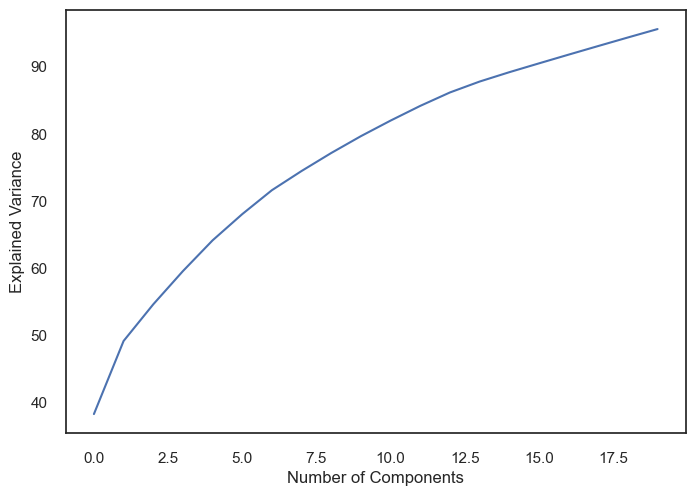

In [91]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.show()

<a id="22"></a>
### Model Selection

* In this section, we will create classification models without hyperparameter optimization. We will apply hyperparameter optimization to the models that achieve the highest accuracy values.
* We apply this method because there will be a problem caused by the CPU.

In [92]:
models=["BC","SVC","KNN","RF","XGB","LightGBM"]
classes=[BaggingClassifier(random_state=0),SVC(random_state=0),KNeighborsClassifier(),RandomForestClassifier(random_state=0),XGBClassifier(),
        LGBMClassifier(random_state=0)]

def solution(model):
    model.fit(X_train2,smote_train_Y)
    return model

def score(model2):
    predict=solution(model2).predict(X_test2)
    asc=accuracy_score(y_test,predict)
    return asc*100

In [93]:
success=[]

for i in classes:
    success.append(score(i))
    
a=list(zip(models,success))
conc=pd.DataFrame(a,columns=["Model","Succes"])
conc.sort_values("Succes",ascending=False)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 127725, number of used features: 20
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


Model  Succes
2       KNN  78.105
3        RF  77.650
0        BC  75.010
4       XGB  72.745
5  LightGBM  69.750
1       SVC  69.435

Let's do hyperparameter optimization for KNN.

<a id="23"></a>
### Hyperparameter Tuning and Model Results

* Since the data is very large, the CPU is insufficient for hyperparameter optimization.
* We will find the n_neighbors parameter that gives the most successful results for the KNN model. Then we will build Random Forest classifier model and compare two models.

In [94]:
success2=[]

for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train2,smote_train_Y)
    predict2=knn.predict(X_test2)
    success2.append(accuracy_score(y_test,predict2))

max(success2)

0.78275

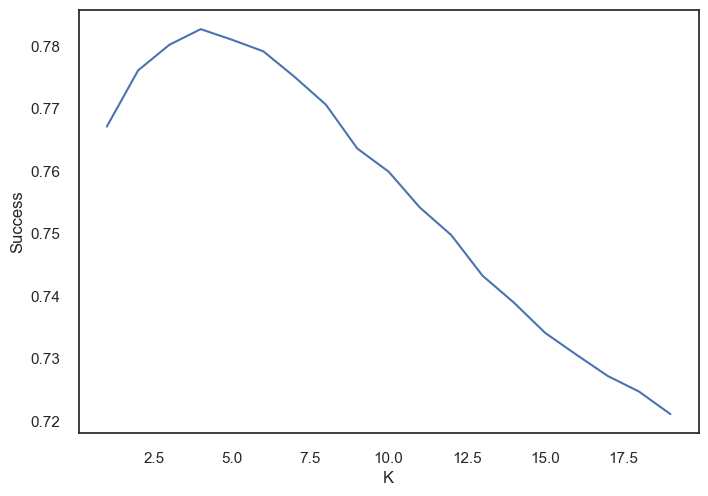

In [95]:
plt.plot(range(1,20),success2)
plt.xlabel("K")
plt.ylabel("Success")
plt.show()

In [96]:
# k=4
knn_model=KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train2,smote_train_Y)
knn_predict=knn_model.predict(X_test2)

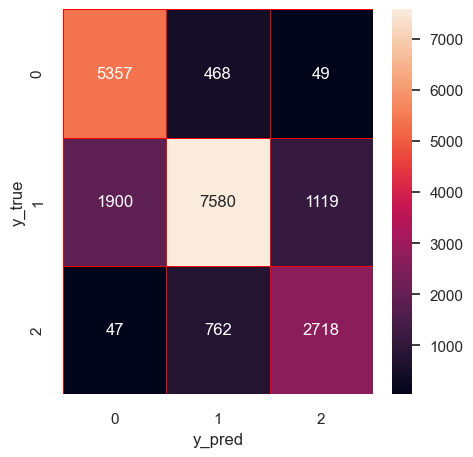

In [97]:
# Confusion matrix
y_true=y_test
cm1=confusion_matrix(y_true,knn_predict)

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm1, annot=True, linewidths=0.5, linecolor="red", fmt= ".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [98]:
print(classification_report(y_true,knn_predict))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81      5874
           1       0.86      0.72      0.78     10599
           2       0.70      0.77      0.73      3527

    accuracy                           0.78     20000
   macro avg       0.76      0.80      0.78     20000
weighted avg       0.79      0.78      0.78     20000



In [99]:
# Random Forest:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train2,smote_train_Y)
rf_predict=rf_model.predict(X_test2)

rf_acs=accuracy_score(y_test,rf_predict)
print(rf_acs*100)

77.64999999999999


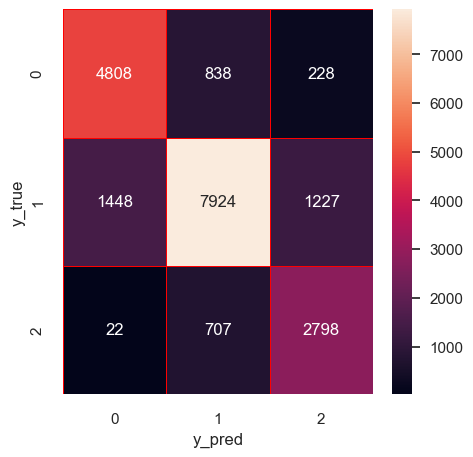

In [100]:
# Confusion matrix
cm1=confusion_matrix(y_true,rf_predict)

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm1, annot=True, linewidths=0.5, linecolor="red", fmt= ".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [101]:
print(classification_report(y_true,rf_predict))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      5874
           1       0.84      0.75      0.79     10599
           2       0.66      0.79      0.72      3527

    accuracy                           0.78     20000
   macro avg       0.75      0.79      0.77     20000
weighted avg       0.78      0.78      0.78     20000



<a id="24"></a>
### Ensemble Modeling

In [102]:
votingC=VotingClassifier(estimators=[("KNN",KNeighborsClassifier(n_neighbors=4)),
                                    ("RF",RandomForestClassifier(random_state=0)),
                                    ("BC",BaggingClassifier(random_state=0))],
                        voting="soft", n_jobs=-1)

votingC.fit(X_train2,smote_train_Y)
print(accuracy_score(votingC.predict(X_test2),y_test))

0.7924


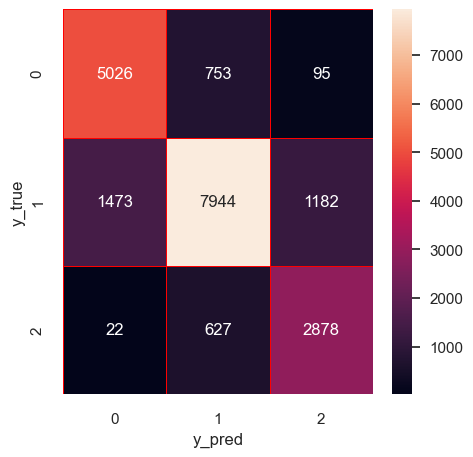

In [103]:
y_pred=votingC.predict(X_test2)

cm=confusion_matrix(y_true,y_pred)

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt= ".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [104]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      5874
           1       0.85      0.75      0.80     10599
           2       0.69      0.82      0.75      3527

    accuracy                           0.79     20000
   macro avg       0.77      0.81      0.79     20000
weighted avg       0.80      0.79      0.79     20000



* In the ensemble model, the prediction of the credit score with the good label improved. Accuracy increased to 0.79.